In [285]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
# sns.set_context('talk', font_scale = 0.8) # optional
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# import seaborn.timeseries

from IPython.display import display

In [286]:
os.getcwd()

'C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)'

In [287]:
# os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs')
os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)')

In [288]:
files = []
# for x in os.listdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs'):
for x in os.listdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)'):

    if x.endswith("table.csv"):
        files.append(x)
print(len(files))
files

11


['01. All-mobilities (6x)-table.csv',
 '02. 90%-compliance all-mobilities (6x)-table.csv',
 '03. Queue-distance-1.5 all-mobilities (6x)-table.csv',
 '04. Queue-distance-0.5 all-mobilities (6x)-table.csv',
 '05. Plot-size 25m all-mobilities (6x)-table.csv',
 '06. Factor-asymptomatic 2 all-mobilities (6x)-table.csv',
 '07. Mask-effect 50% all-mobilities (6x)-table.csv',
 '08. 80%-compliance all-mobilities (6x)-table.csv',
 '09. 20% elderly - all-mobilities (6x)-table.csv',
 '10. 20% elderly - 1.5m queuedistance -  all-mobilities (6x)-table.csv',
 '11. Mask-effect 50% compliance-90% all-mobilities (6x)-table.csv']

In [289]:
# files = files[0:2]

**The numbers in front of the filenames correspond with the experiment names.**

**Separate dataframes are created for each experiment.**

In [290]:
## Not necessary anymore (attempt to automatize reading all dfs)

# for file in files:
#     experimentNo = file.split('. ')[0]  # this gives the range  01, 02, 03, etc.
#     print(experimentNo)
    
#     df = pd.DataFrame()
#     df = pd.read_csv(file, skiprows = 6)
#     df['experimentNo'] = experimentNo
# #     str('exp' + experimentNo) = df
#     df.name = str('exp' + experimentNo)
# #         exp1df = exp1df.append(df)
# #     x = 'exp' + str(i) + 'df'
# #     print(x)

In [291]:
# df.name

In [292]:
# exp1df = pd.DataFrame()
# exp2df = pd.DataFrame()
# exp3df = pd.DataFrame()
# exp4df = pd.DataFrame()
# exp5df = pd.DataFrame()
# exp6df = pd.DataFrame()
# exp7df = pd.DataFrame()

# exp8df = pd.DataFrame()
# exp9df = pd.DataFrame()
# exp10df = pd.DataFrame()


In [293]:
# exp1df
# 
allexpdf = []
print(type(allexpdf))
allexpdf

<class 'list'>


[]

**All dataframes will be stored in a dictionary called 'mydict'.**

- This happens after reading in a csv and adjusting it accordingly.
- exp1df must always be read.


- to clear the dictionary, do: mydict.clear()


- to check which dataframes exist in the file, run: 
    - all_df_in_mem = %who_ls DataFrame
    - all_df_in_mem

### *Klooien met dictionaries:*

In [294]:
# for x in mydict:  # doet hetzelfde
for key in mydict.keys():
    print(x)

networks
networks
networks
networks
networks
networks
networks
networks
networks
networks


In [295]:
for values in mydict.items():
    print(values['cum-recovered'])

TypeError: tuple indices must be integers or slices, not str

In [296]:
mydict['exp2df']['run'] = np.where(exp2df['run'] >= 6, (exp2df['run'] % 6) + 1, exp2df['run']) # werkt.


# mydict['exp2df']['testcolumn'] == (mydict['exp1df']['run'] * 2) # kan niet, want testcolumn bestaat nog niet.

In [297]:
#kan ik dit dan ook in een for-loop voor alle expdfs tegelijk doen? ja!
for key in mydict.keys():
    mydict[key]['run'] = 1
    mydict[key]['runtest'] = 2
    print(mydict[key]['runtest'])

0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64
0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64
0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64
0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64
0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64
0          2
1          2
2          2
3          2
4       

In [298]:
exp1df['runtest']

0          2
1          2
2          2
3          2
4          2
          ..
2592019    2
2592020    2
2592021    2
2592022    2
2592023    2
Name: runtest, Length: 2592024, dtype: int64

### Data inlezen
- read csv
- replace column names in dataframe *m*

**1. Main dataset: *exp1df***

In [299]:
#exp1:
exp1df = pd.DataFrame()

for file in files:
    if file.startswith("01. "):
        # experimentNo = 0
        experimentNo = 1
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

        exp1df = exp1df.append(df)
        
        print('I finished file ' + file)


I finished file 01. All-mobilities (6x)-table.csv


**2. Adapt the column names to make them more readable.**

In [300]:
exp1df.columns = ['run','compliance','transmission-probability',
# m.columns = ['index','run','compliance','transmission-probability',
 'household-size',
 'plotsize-shelters',
 'factor-asymptomatic',
 'mobility',
 'poor-conditions?',
 'block-size',
 'queue-distance',
 'mask-usage','mask-effect',
 'show-colors?',
 'tick',
 'Day',
 'Hour',
 'count tents',
 'infected elderly', #count tents with [(my-age = "elderly") and (infected? = true)]',
 'infected children', #count tents with [(my-age = "child") and (infected? = true)]',
 'infected adults', #count tents with [(my-age = "adult") and (infected? = true)]',
 'symptomatic elderly', #count tents with [(my-age = "elderly") and (infection = "symptomatic")]',
 'symptomatic children', #count tents with [(my-age = "child") and (infection = "symptomatic")]',
 'symptomatic adults', #count tents with [(my-age = "adult") and (infection = "symptomatic")]',
 'severe elderly', #count tents with [(my-age = "elderly") and (infection = "severely-symptomatic")]',
 'severe children', #count tents with [(my-age = "child") and (infection = "severely-symptomatic")]',
 'severe adults', #count tents with [(my-age = "adult") and (infection = "severely-symptomatic")]',
 'critical elderly', #count tents with [(my-age = "elderly") and (infection = "critical")]',
 'critical children', #count tents with [(my-age = "child") and (infection = "critical")]',
 'critical adults', #count tents with [(my-age = "adult") and (infection = "critical")]',
 'recovered elderly', #count tents with [(my-age = "elderly") and (infection = "recovered")]',
 'recovered children', #count tents with [(my-age = "child") and (infection = "recovered")]',
 'recovered adults', #count tents with [(my-age = "adult") and (infection = "recovered")]',
 'cum-dead',
 'cum-recovered',
 'IC-capacity', #[ic-capacity] of one-of covid-facilities',
 'bed-capacity',
 'experimentNo'] #[bed-capacity] of one-of covid-facilities']]

#add column with cum-infected
# exp1df['cum-infected'] = exp1df['infected elderly'] + exp1df['infected children'] + exp1df['infected adults']
# let the run numbers be 1-6:
# exp1df['run'] = np.where(exp1df['run'] >= 6, (exp1df['run'] % 6) + 1, exp1df['run'])

mydict = {'exp1df' : exp1df}

In [301]:
# exp2:
exp2df = pd.DataFrame()

for file in files:
    if file.startswith("02. "):
        # experimentNo = 0
        experimentNo = 2
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp2df = exp2df.append(df)
        exp2df.columns = exp1df.columns
        
        print('I finished file ' + file)
# exp2df.columns = exp1df.columns
# exp2df['cum-infected'] = exp2df['infected elderly'] + exp2df['infected children'] + exp2df['infected adults']
# exp2df['run'] = np.where(exp2df['run'] >= 6, (exp2df['run'] % 6) + 1, exp2df['run'])

mydict['exp2df'] = exp2df

I finished file 02. 90%-compliance all-mobilities (6x)-table.csv


In [302]:
# exp3:
exp3df = pd.DataFrame()

for file in files:
    if file.startswith("03. "):
        # experimentNo = 0
        experimentNo = 3
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp3df = exp3df.append(df)
        exp3df.columns = exp1df.columns
        
        print('I finished file ' + file)
        
mydict['exp3df'] = exp3df

I finished file 03. Queue-distance-1.5 all-mobilities (6x)-table.csv


In [303]:
# exp4:
exp4df = pd.DataFrame()

for file in files:
    if file.startswith("04. "):
        # experimentNo = 0
        experimentNo = 4
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp4df = exp4df.append(df)
        exp4df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp4df'] = exp4df

I finished file 04. Queue-distance-0.5 all-mobilities (6x)-table.csv


In [304]:
# exp5:
exp5df = pd.DataFrame()

for file in files:
    if file.startswith("05. "):
        # experimentNo = 0
        experimentNo = 5
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp5df = exp5df.append(df)
        exp5df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp5df'] = exp5df

I finished file 05. Plot-size 25m all-mobilities (6x)-table.csv


In [305]:
# exp6:
exp6df = pd.DataFrame()

for file in files:
    if file.startswith("06. "):
        # experimentNo = 0
        experimentNo = 6
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp6df = exp6df.append(df)
        exp6df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp6df'] = exp6df

I finished file 06. Factor-asymptomatic 2 all-mobilities (6x)-table.csv


In [306]:
# exp7:
exp7df = pd.DataFrame()

for file in files:
    if file.startswith("07. "):
        # experimentNo = 0
        experimentNo = 7
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp7df = exp7df.append(df)
        exp7df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp7df'] = exp7df

I finished file 07. Mask-effect 50% all-mobilities (6x)-table.csv


In [307]:
# exp8:
exp8df = pd.DataFrame()

for file in files:
    if file.startswith("08. "):
        # experimentNo = 0
        experimentNo = 8
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp8df = exp8df.append(df)
        exp8df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp8df'] = exp8df

I finished file 08. 80%-compliance all-mobilities (6x)-table.csv


In [308]:
# exp9:
exp9df = pd.DataFrame()

for file in files:
    if file.startswith("09. "):
        # experimentNo = 0
        experimentNo = 9
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp9df = exp9df.append(df)
        exp9df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp9df'] = exp9df


I finished file 09. 20% elderly - all-mobilities (6x)-table.csv


In [309]:
# exp10:
exp10df = pd.DataFrame()

for file in files:
    if file.startswith("10. "):
        # experimentNo = 0
        experimentNo = 10
        df = pd.read_csv(file, skiprows = 6)
        df['experimentNo'] = experimentNo

            
        exp10df = exp10df.append(df)
        exp10df.columns = exp1df.columns

        
        print('I finished file ' + file)
        
mydict['exp10df'] = exp10df

I finished file 10. 20% elderly - 1.5m queuedistance -  all-mobilities (6x)-table.csv


In [310]:
exp1df.head()

run  compliance  transmission-probability  household-size  \
0    4         100                         5               5   
1    3         100                         5               5   
2    4         100                         5               5   
3    4         100                         5               5   
4    4         100                         5               5   

  plotsize-shelters  factor-asymptomatic mobility  poor-conditions?  \
0           12,5 m2                    1     free              True   
1           12,5 m2                    1     free              True   
2           12,5 m2                    1     free              True   
3           12,5 m2                    1     free              True   
4           12,5 m2                    1     free              True   

     block-size  queue-distance  ... critical children  critical adults  \
0  120 shelters               1  ...                 0                0   
1  120 shelters               1  ...                 0                0   
2  120 shelters               1  ...                 0                0   
3  120 shelters               1  ...                 0                0   
4  120 shelters               1  ...                 0                0   

   recovered elderly  recovered children  recovered adults  cum-dead  \
0                  0                   0                 0         0   
1                  0                   0                 0         0   
2                  0                   0                 0         0   
3                  0                   0                 0         0   
4                  0                   0                 0         0   

   cum-recovered  IC-capacity  bed-capacity  experimentNo  
0              0            8           100             1  
1              0            8           100             1  
2              0            8           100             1  
3              0            8           100             1  
4              0            8           100             1  

[5 rows x 37 columns]

In [311]:
# # To view all column names:
# list(exp1df.columns.values)

**3. Use a for loop to adapt all values and prepare the expdfs**
- add a column with cumulative infections
- shorten all column names
- number the runs from (1-6)

In [312]:
exp8df.columns

Index(['run', 'compliance', 'transmission-probability', 'household-size',
       'plotsize-shelters', 'factor-asymptomatic', 'mobility',
       'poor-conditions?', 'block-size', 'queue-distance', 'mask-usage',
       'mask-effect', 'show-colors?', 'tick', 'Day', 'Hour', 'count tents',
       'infected elderly', 'infected children', 'infected adults',
       'symptomatic elderly', 'symptomatic children', 'symptomatic adults',
       'severe elderly', 'severe children', 'severe adults',
       'critical elderly', 'critical children', 'critical adults',
       'recovered elderly', 'recovered children', 'recovered adults',
       'cum-dead', 'cum-recovered', 'IC-capacity', 'bed-capacity',
       'experimentNo'],
      dtype='object')

In [313]:
#kan ik dit dan ook in een for-loop voor alle expdfs tegelijk doen?
for key in mydict.keys():
    #add column with cumulative infections
    mydict[key]['cum-infected'] = mydict[key]['infected elderly'] + mydict[key]['infected children'] + mydict[key]['infected adults']
    
    #make all column names equal to exp1df
    mydict[key].columns = mydict['exp1df'].columns # kan pas na de vorige, anders is exp1df al één kolom langer.
    
    #set the run numbers from 1-6:
    mydict[key]['run'] = np.where(mydict[key]['run'] >= 6, (mydict[key]['run'] % 6) + 1, mydict[key]['run'])

    

**4. Create a new dictionary with all plotDFs**
- create a new dictionary from the previous one with copies of the previous ones, but then called plotDF

**5. Use pivot table to add a column with daily infections: (21/08)**

- Create a pivot table with the desired values (plotDFx1)
- Reset_index to obtain the right format for plots (plotDFx2)
- Add columns with daily infections


*(x in the DF name is the experiment number)*

In [314]:
plotdict = dict(mydict)
for key in plotdict.keys():
    #Find the maxmimum values for every day (end of the day value; assumption):
    plotdict[key] = plotdict[key].pivot_table(values = ['cum-infected','infected elderly','infected adults','infected children'], index = ['mobility','run','Day'], aggfunc = np.max)
    
    #Calculate the differences between these values to obtain daily infections:
    plotdict[key]['daily-infections'] = plotdict[key]['cum-infected'].diff()
    plotdict[key]['daily-elderly-infections'] = plotdict[key]['infected elderly'].diff()
    plotdict[key]['daily-adults-infections'] = plotdict[key]['infected adults'].diff()
    plotdict[key]['daily-children-infections'] = plotdict[key]['infected children'].diff()
    
    #Reset index to obtaine a normal df format again, without multi index:
    plotdict[key].reset_index(inplace = True)
    
    # At Day 0 of each run, the daily infections should equal 0, 
    #instead of a negative value that occurs when calcuating the 
    #difference with the last day of the previous run:
    plotdict[key]['daily-infections'] = np.where(plotdict[key]['Day'] == 0, 0, plotdict[key]['daily-infections'])
    plotdict[key]['daily-elderly-infections'] = np.where(plotdict[key]['Day'] == 0, 0, plotdict[key]['daily-elderly-infections'])
    plotdict[key]['daily-adults-infections'] = np.where(plotdict[key]['Day'] == 0, 0, plotdict[key]['daily-adults-infections'])
    plotdict[key]['daily-children-infections'] = np.where(plotdict[key]['Day'] == 0, 0, plotdict[key]['daily-children-infections'])
    
    plotdict[key] = plotdict[key].reset_index()
plotdict[key].head()

index mobility  run  Day  cum-infected  infected adults  infected children  \
0      0     free    1    0             1                1                  0   
1      1     free    1    1             1                1                  0   
2      2     free    1    2             1                1                  0   
3      3     free    1    3             3                2                  0   
4      4     free    1    4             3                2                  0   

   infected elderly  daily-infections  daily-elderly-infections  \
0                 1               0.0                       0.0   
1                 1               0.0                       0.0   
2                 1               0.0                       0.0   
3                 2               2.0                       1.0   
4                 2               0.0                       0.0   

   daily-adults-infections  daily-children-infections  
0                      0.0                        0.0  
1                      0.0                        0.0  
2                      0.0                        0.0  
3                      1.0                        0.0  
4                      0.0                        0.0

**6. Plot the daily infections and cumulative infections across the experiments:**

1. Experiment 1: effect of mobility restrictions
2. Experiment 2: effect of a lower compliance (90%)
3. Experiment 3: effect of a larger queue-distance (1.5m)
4. Experiment 4: effect of a smaller queue-distance (0.5m)
5. Experiment 5: effect of a larger plot-size (25m2)
6. Experiment 6: effect of fraction asymptomatic x2
7. Experiment 7: effect of wearing masks (50% effect)
8. Experiment 8: effect of wearing masks and lower compliance (50% effect, 90% compliance)


* *expXdfDFx2 = for daily infections*

* *expDFx5 = for cumulative infections*

*(x in the DF name is the experiment number)*

### Create subplots of exp1 (effect of mobility restrictions):

**Different variations of 'relplots':**

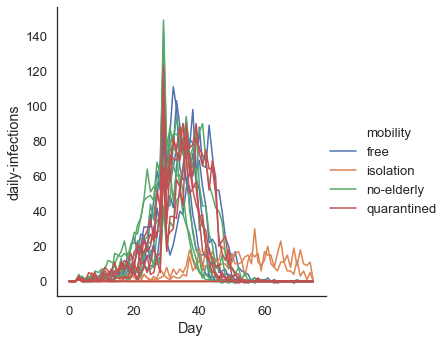

In [315]:
g = sns.relplot(x = 'Day', y = 'daily-infections',hue = 'mobility', units = 'run', estimator = None, kind = 'line', data = plotdict['exp1df'])
#units defines that you have multiple samples (runs), hence creates separate lines for them.

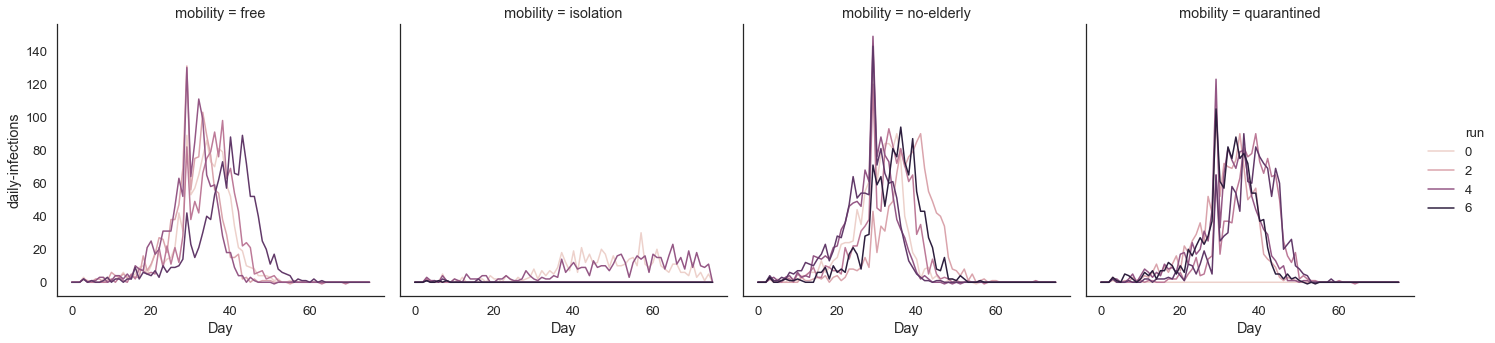

In [316]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'run', estimator = None, kind = 'line', data = plotdict['exp1df'])


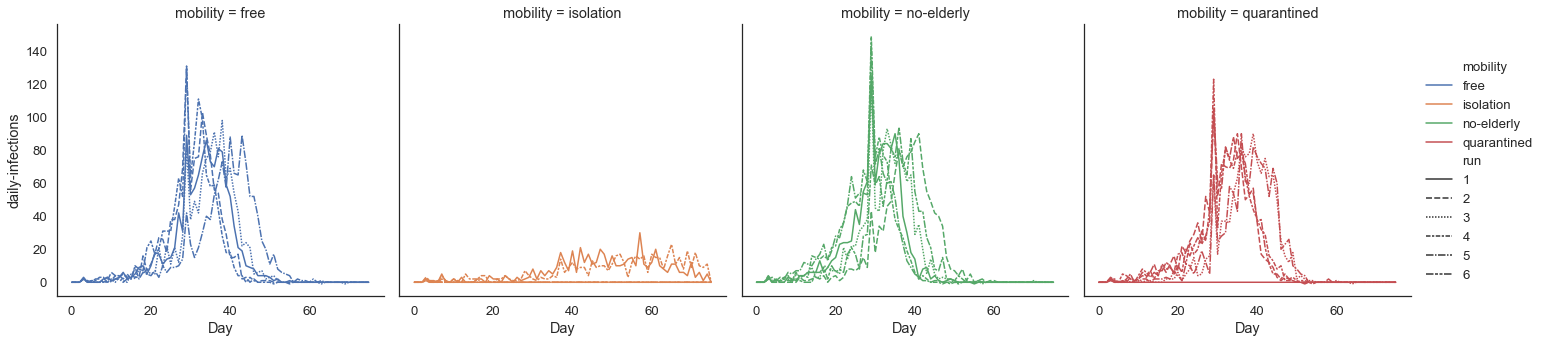

In [317]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', style = 'run', hue = 'mobility', data = plotdict['exp1df'])
# , col_wrap = 2

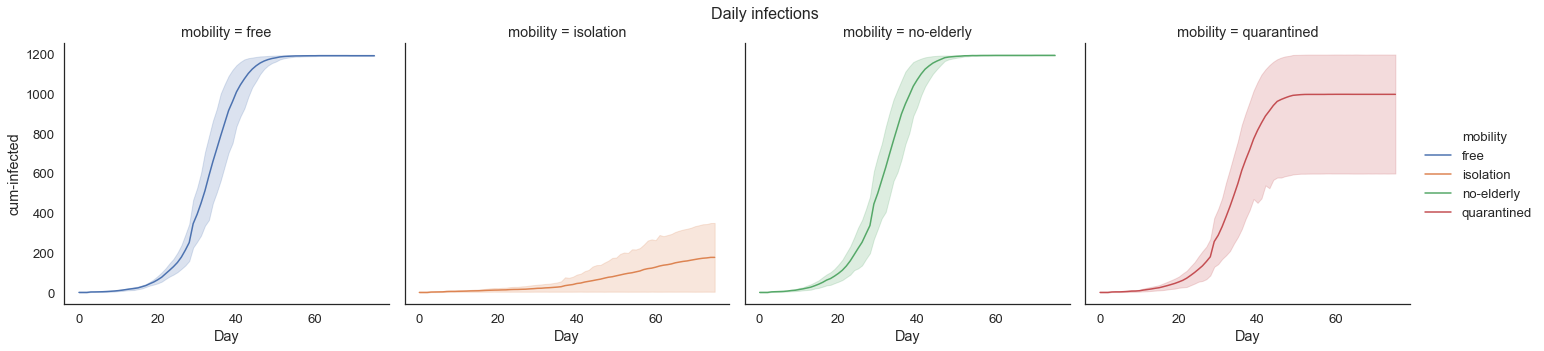

In [318]:
sns.set_context('notebook', font_scale = 1.2)
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', hue = 'mobility', data = plotdict['exp1df'])
g.fig.suptitle('Daily infections', fontsize=16)


g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

**To create a similar plot, but then with data about the age groups, the dataset has to be reshaped.**

- Create a dataset with columns: run | Day | mobility | data | dataype
- Plot *data* with hue = *datatype*


- anything can be filled in for mobility | data | dataype

In [319]:
m1 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-infections'],
            var_name = 'datatype',value_name = 'data')
m2 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m5 = m1.append([m2, m3, m4])
m5.head()

run  Day mobility          datatype  data
0    1    0     free  daily-infections   0.0
1    1    1     free  daily-infections   0.0
2    1    2     free  daily-infections   0.0
3    1    3     free  daily-infections   3.0
4    1    4     free  daily-infections   0.0

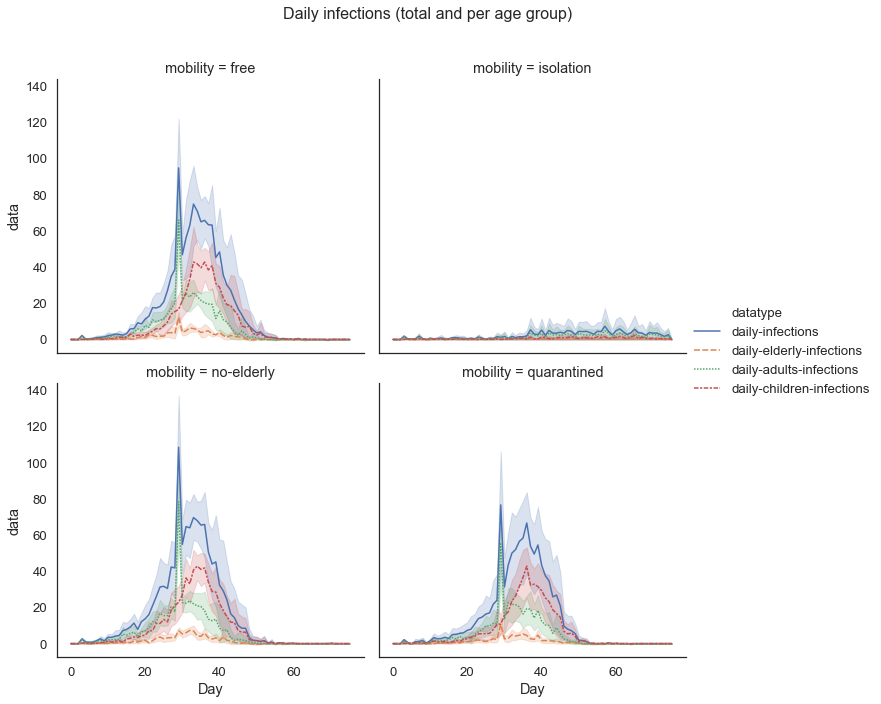

In [320]:
g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m5)
g.fig.suptitle('Daily infections (total and per age group)', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

En zonder de total daily infections:

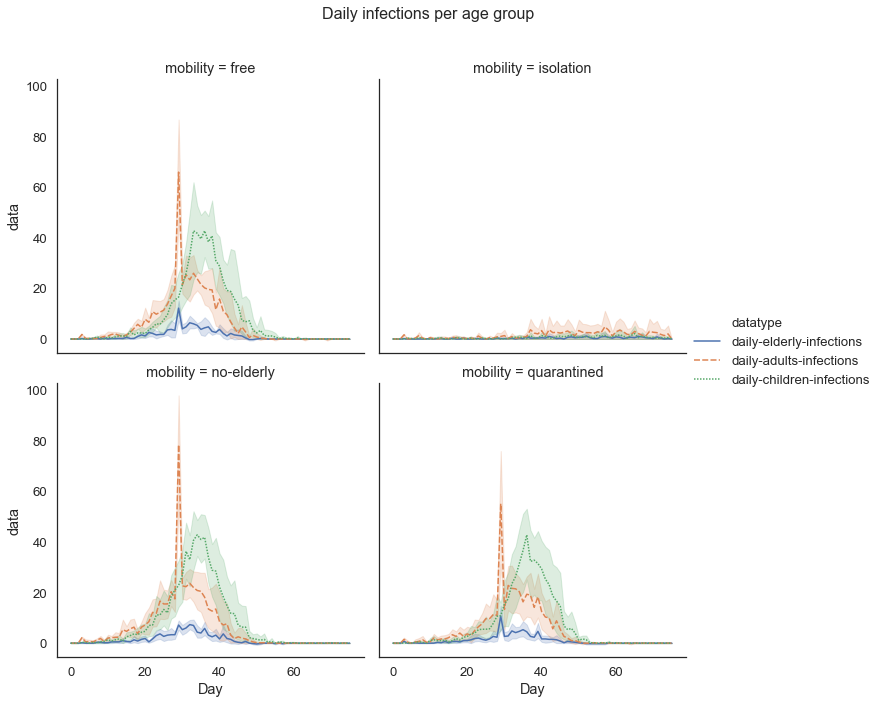

In [321]:
m2 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotdict['exp1df'], id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m5 = m2.append([m3, m4])
m5.head()

sns.set_context ('notebook', font_scale = 1.2)

g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m5)
g.fig.suptitle('Daily infections per age group', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

In [322]:
sns.set_context ('notebook', font_scale = 1.2)


***Kan ik een stacked bar chart maken voor adults/elderly/children?***

I can create a stacked area chart for 1 run:

76
8


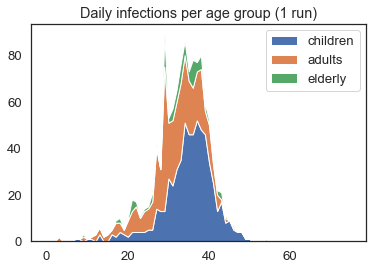

In [323]:
# g = sns.FacetGrid(df1run, col='mobility',hue = 'mobility') #This would make multiple plots
df1run = plotdict['exp1df'].where(plotdict['exp1df']['run'] == 1).dropna()

y1 = df1run['daily-children-infections'].where(df1run['mobility'] == 'free').dropna()
y2 = df1run['daily-adults-infections'].where(df1run['mobility'] == 'free').dropna()
y3 = df1run['daily-elderly-infections'].where(df1run['mobility'] == 'free').dropna()
# y4 = df1run['daily-elderly-infections'].where(df1run['mobility'] == 'no-elderly').dropna()
# x = df1run['Day'].where(df1run['mobility'] == 'free').dropna()
print(len(y1))
print(len(x))
# x = range(0,51)
x = df1run['Day'].unique()
len(x)

plt.stackplot(x, y1, y2, y3, labels = ['children','adults','elderly'])
plt.legend()
plt.title('Daily infections per age group (1 run)')
plt.show()
# plt.stackplot(x, y1, y2, y3)

Combining the above two in one for-loop for each mobility type, for 1 run

- Should be possible for average over runs as well

***This looks nice, but might be more useful for the cumulative infections. 
I could use plotDFx2 for this, but I use a separate one (plotDFx5), keeping the daily and cumulative infections separate:***

In [324]:
# plotDF14 = exp1df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF15 = plotDF14.reset_index()
# plotDF15

# plotDF24 = exp2df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF25 = plotDF24.reset_index()
# plotDF25

# # plotDF34 = exp3df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# # plotDF35 = plotDF34.reset_index()
# # plotDF35

# # plotDF44 = exp4df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# # plotDF45 = plotDF44.reset_index()
# # plotDF45

# plotDF74 = exp7df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF75 = plotDF74.reset_index()
# plotDF75

# plotDF84 = exp8df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF85 = plotDF84.reset_index()
# plotDF85

# plotDF94 = exp9df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF95 = plotDF94.reset_index()
# plotDF95

# plotDF104 = exp10df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF105 = plotDF104.reset_index()
# plotDF105

<Figure size 1440x360 with 0 Axes>

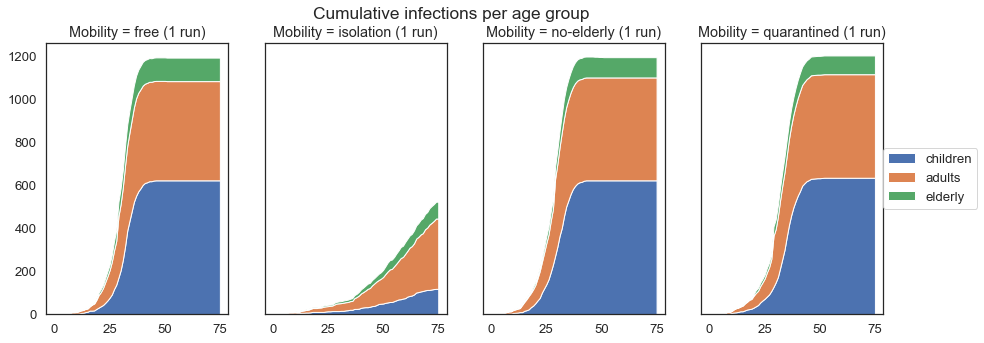

In [325]:
# Cumulative infections per age group for 1 run:
df1run = plotdict['exp1df'].where(plotdict['exp1df']['run'] == 4 ).dropna()

mobilitylist = list (df1run['mobility'].unique())
fig = plt.figure(figsize = (20,5))
fig, axes = plt.subplots(1,4, sharey = True)


for i in range(len(mobilitylist)):
    k = mobilitylist[i]
    x = df1run['Day'].unique()
    y1 = df1run['infected children'].where(df1run['mobility'] == k).dropna()
    y2 = df1run['infected adults'].where(df1run['mobility'] == k).dropna()
    y3 = df1run['infected elderly'].where(df1run['mobility'] == k).dropna()
    y = [y1,y2,y3]
    axes[i].stackplot(x, y, labels = ['children','adults','elderly'])
    axes[i].set_title('Mobility = {} (1 run)'.format(k))

    plt.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1,0.5), loc='center left', borderaxespad=0)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.suptitle('Cumulative infections per age group')
# plt.tight_layout()
plt.show()


In [326]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.])

<Figure size 1440x360 with 0 Axes>

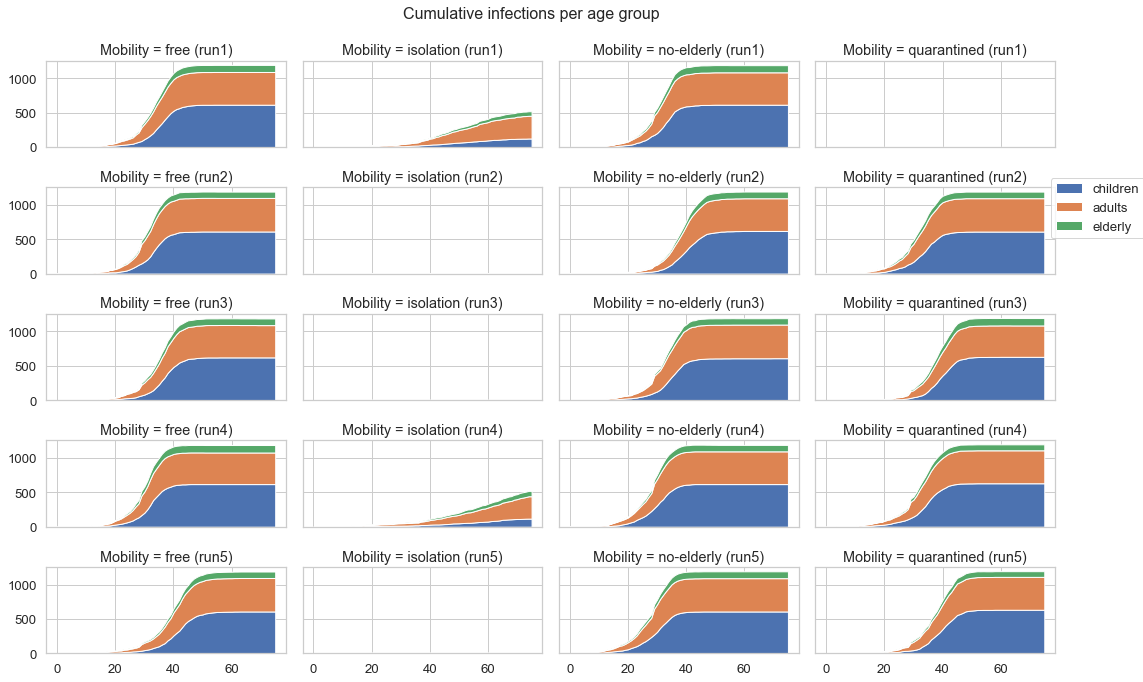

In [327]:
# Cumulative infections for age groups for all runs separately plotted
# df1run = plotDF15.where(plotDF15['run'] == 1).dropna()
sns.set_style('whitegrid')


mobilitylist = list (plotdict['exp1df']['mobility'].unique())
fig = plt.figure(figsize = (20,5))
fig, axes = plt.subplots(5,4, sharey = True, sharex = True)



# for j in plotDF15['run'].unique():
for j in range(1,6):
    df1run = plotdict['exp1df'].where(plotdict['exp1df']['run'] == j).dropna()
    for i in range(len(mobilitylist)):
        k = mobilitylist[i]
        x = df1run['Day'].unique()
        y1 = df1run['infected children'].where(df1run['mobility'] == k).dropna()
        y2 = df1run['infected adults'].where(df1run['mobility'] == k).dropna()
        y3 = df1run['infected elderly'].where(df1run['mobility'] == k).dropna()
        y = [y1,y2,y3]
        axes[(j-1),i].set_title('Mobility = {} (run{})'.format(k,j))
        axes[(j-1),i].stackplot(x, [y1,y2,y3], labels = ['children','adults','elderly'])

fig.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1.06,0.7), loc='upper right', borderaxespad=0)
fig.set_figheight(10)
fig.set_figwidth(15)
# plt.subplots_adjust(top=0.85)
plt.suptitle('Cumulative infections per age group', fontsize = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [328]:
for j in plotdict['exp1df']['run'].unique():
    df1run = plotdict['exp1df'].where(plotdict['exp1df']['run'] == j).dropna()
    for i in mobilitylist:
        print(i,j)

free 1
isolation 1
no-elderly 1
quarantined 1
free 2
isolation 2
no-elderly 2
quarantined 2
free 3
isolation 3
no-elderly 3
quarantined 3
free 4
isolation 4
no-elderly 4
quarantined 4
free 5
isolation 5
no-elderly 5
quarantined 5
free 6
isolation 6
no-elderly 6
quarantined 6


<Figure size 1440x432 with 0 Axes>

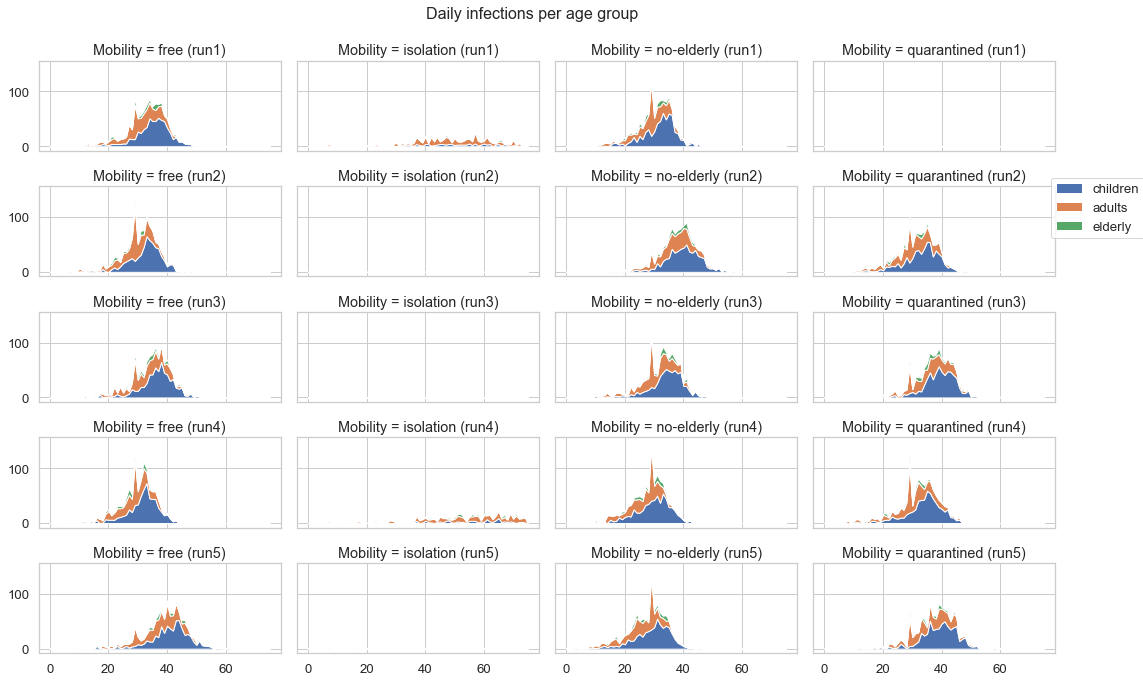

In [329]:
# Daily infections per age group for 5 runs:
mobilitylist = list(plotdict['exp1df']['mobility'].unique())

fig = plt.figure(figsize = (20,6))
fig, axes = plt.subplots(5,4, sharey = True, sharex = True)

# for j in plotDF12['run'].unique():
for j in range(1,6):
    df1run = plotdict['exp1df'].where(plotdict['exp1df']['run'] == j).dropna()
    for i in range(len(mobilitylist)):
        k = mobilitylist[i]
        x = df1run['Day'].unique()
        y1 = df1run['daily-children-infections'].where(df1run['mobility'] == k).dropna()
        y2 = df1run['daily-adults-infections'].where(df1run['mobility'] == k).dropna()
        y3 = df1run['daily-elderly-infections'].where(df1run['mobility'] == k).dropna()
        y = [y1,y2,y3]
        axes[j-1,i].stackplot(x, y, labels = ['children','adults','elderly'])
        axes[j-1,i].set_title('Mobility = {} (run{})'.format(k,j))

fig.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1.06,0.7), loc='upper right', borderaxespad=0)
fig.set_figheight(10)
fig.set_figwidth(15)
# plt.subplots_adjust(top=0.85)
plt.suptitle('Daily infections per age group', fontsize = 16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Create subplots of exp2 (effect of 90% compliance):

**Different variations of 'relplots':**

In [330]:
plotdict['exp1df']['compliance'] = '100'
plotdict['exp2df']['compliance'] = '90'
plotdict['exp8df']['compliance'] = '80'

combidf_12 = plotdict['exp1df'].append(plotdict['exp2df'])

combidf_18 = plotdict['exp1df'].append(plotdict['exp8df'])

combidf_128 = plotdict['exp1df'].append([plotdict['exp2df'],plotdict['exp8df']])

***Review the difference between 100% compliance and 90% compliance for each mobility:***

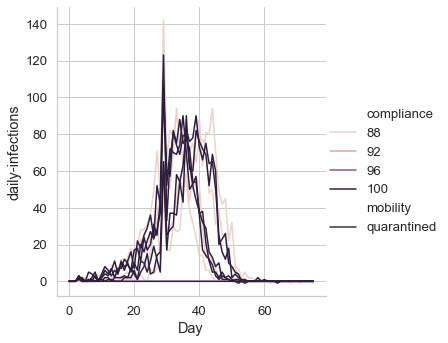

In [331]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_12.where(combidf_12['mobility'] == 'quarantined'))


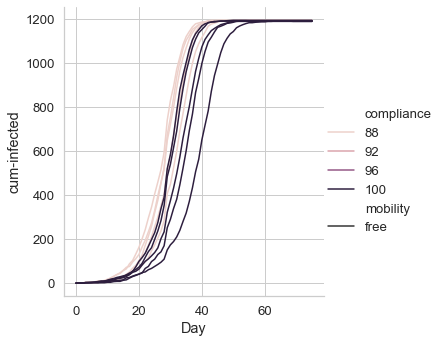

In [332]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_12.where(combidf_12['mobility'] == 'free'))


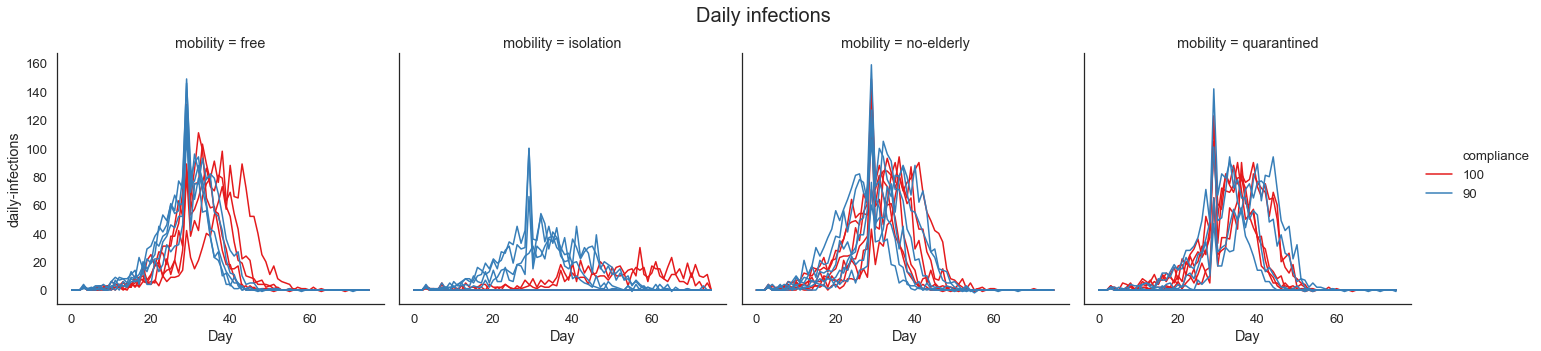

In [333]:
sns.set(font_scale = 1.2)
sns.set_style('white')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'compliance', palette = 'Set1', units = 'run', estimator = None, kind = 'line', data = combidf_12)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

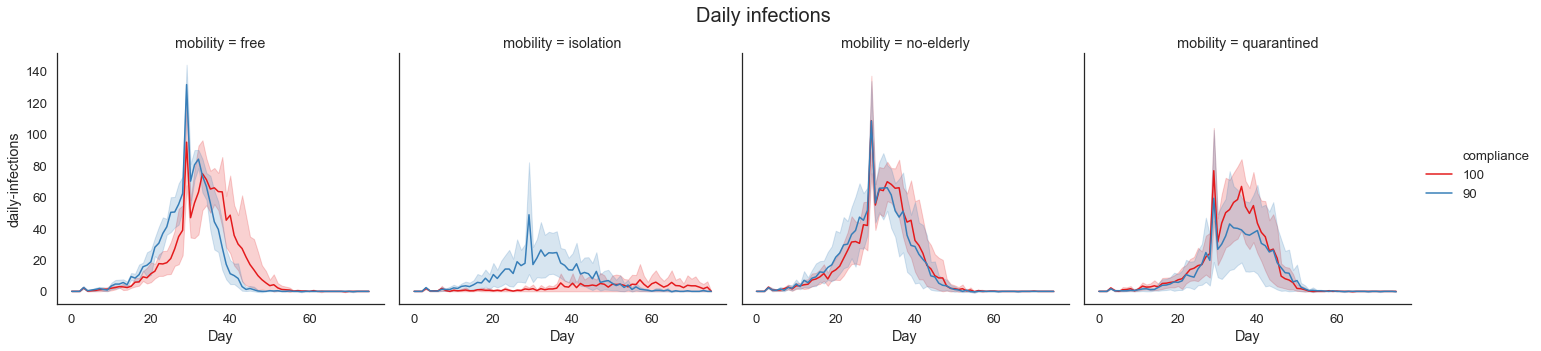

In [334]:
sns.set_style('white')
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_12)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

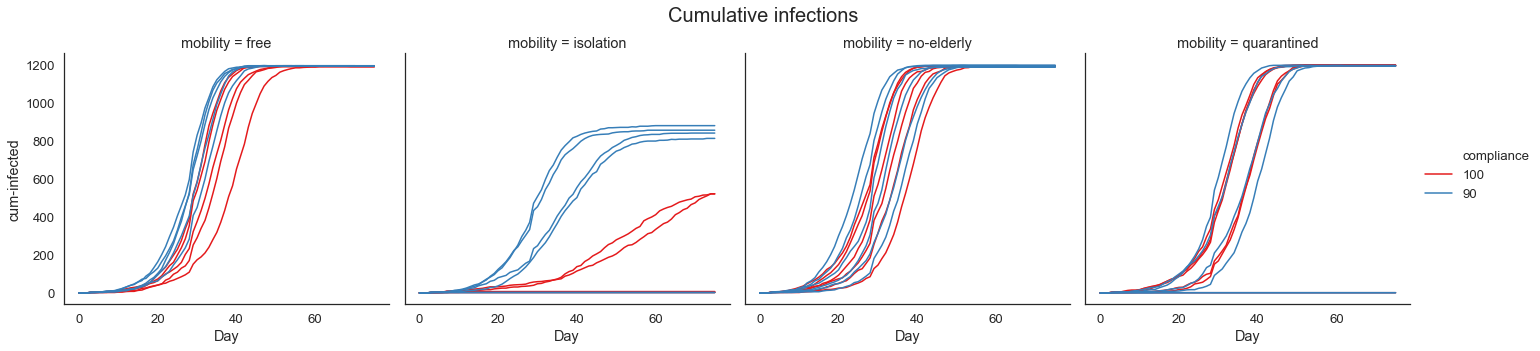

In [335]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_12)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

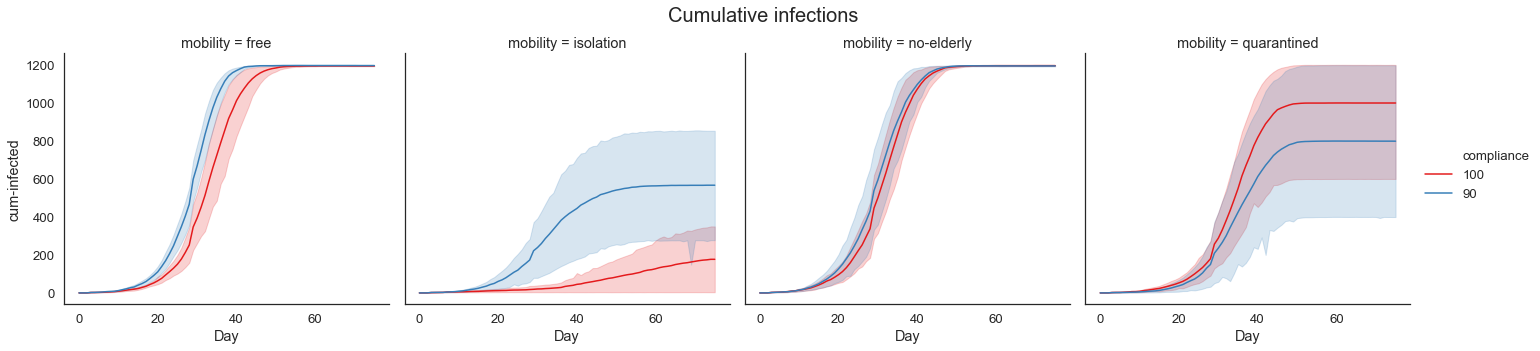

In [336]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_12)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

***Review the difference between 100% compliance and 80% compliance for each mobility:***

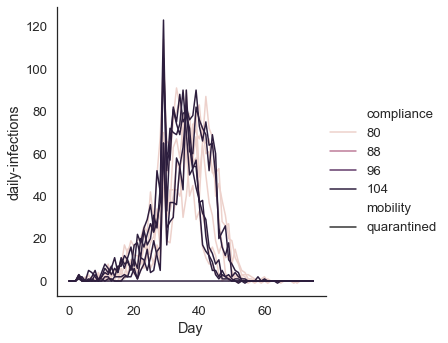

In [337]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_18.where(combidf_18['mobility'] == 'quarantined'))


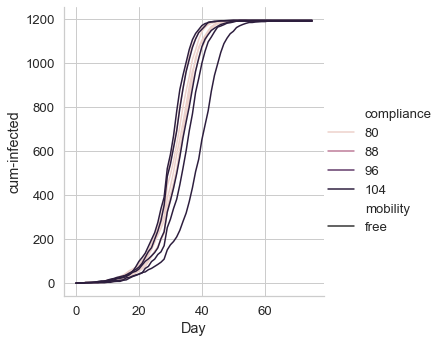

In [338]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_18.where(combidf_18['mobility'] == 'free'))


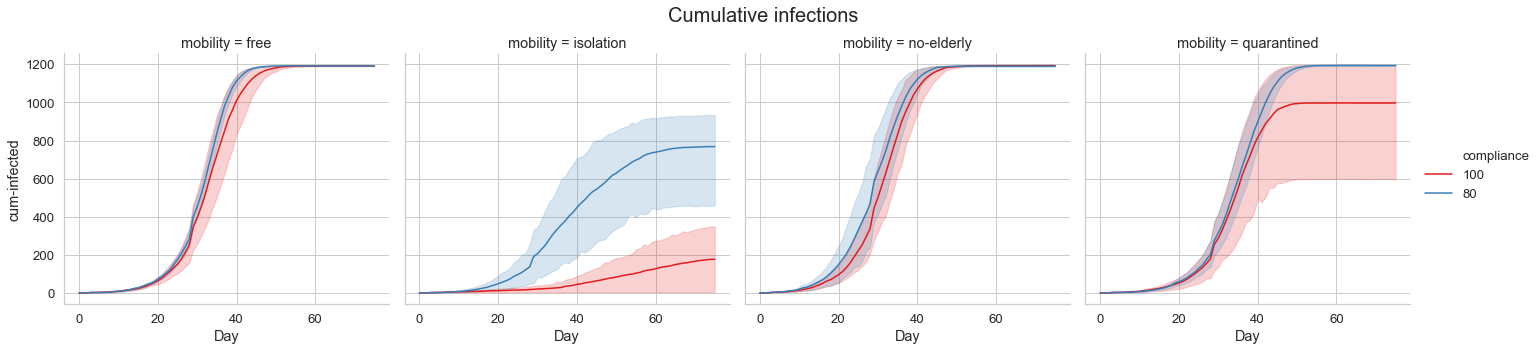

In [339]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_18)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

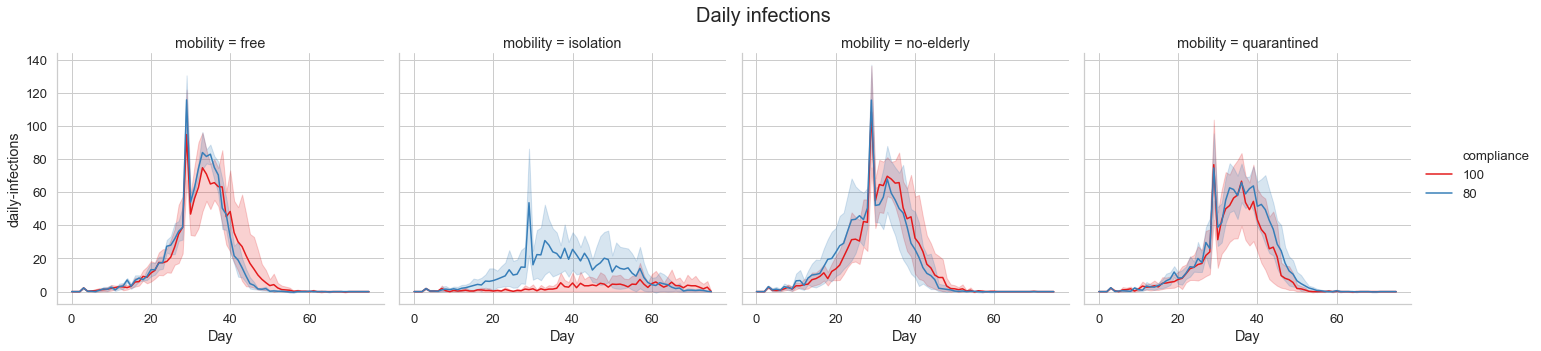

In [340]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_18)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

***Review the difference between 100% / 90% / 80% compliance for each mobility:***

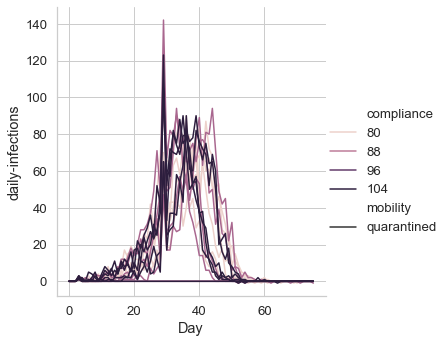

In [341]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_128.where(combidf_128['mobility'] == 'quarantined'))


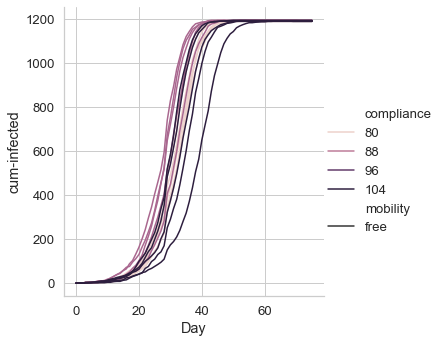

In [342]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'compliance', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_128.where(combidf_128['mobility'] == 'free'))


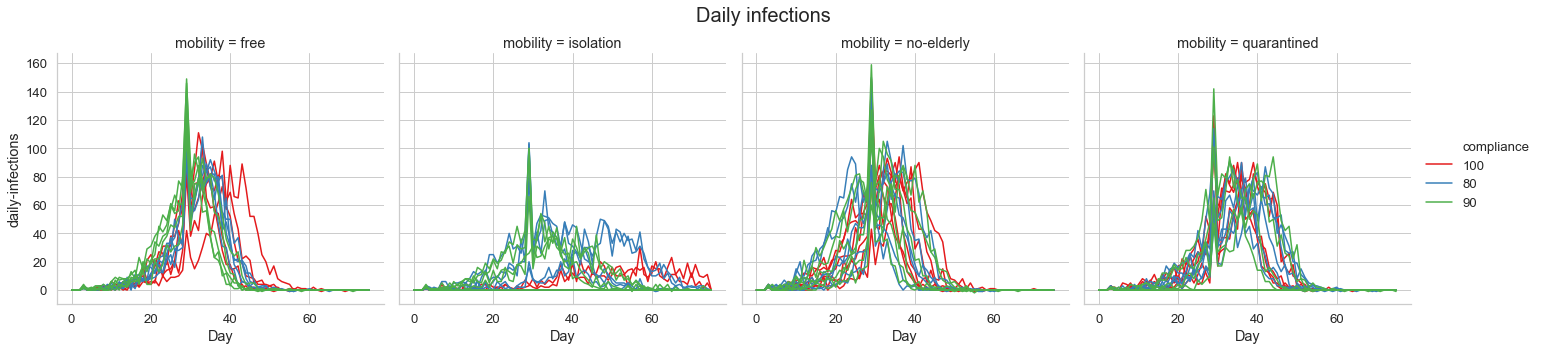

In [343]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'compliance', palette = 'Set1', units = 'run', estimator = None, kind = 'line', data = combidf_128)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

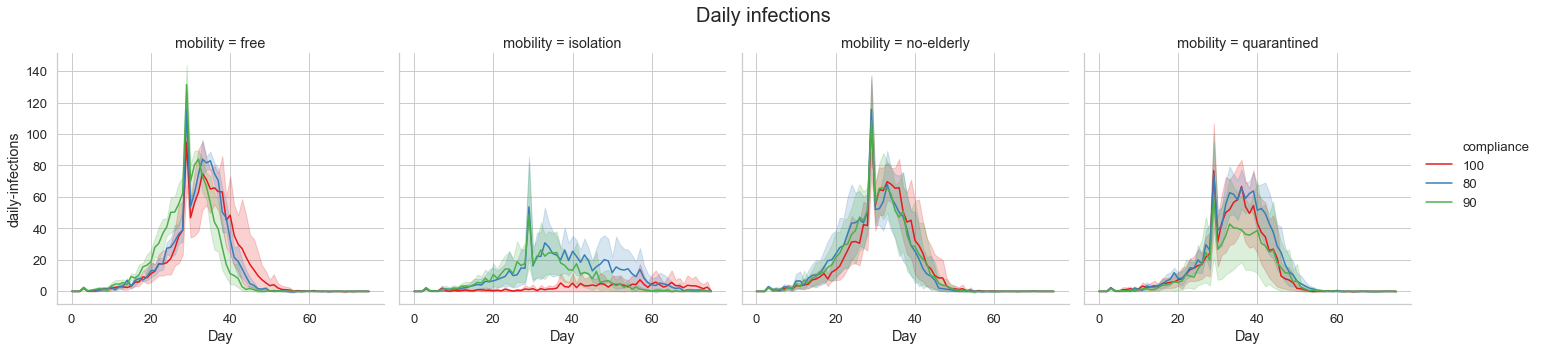

In [344]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_128)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

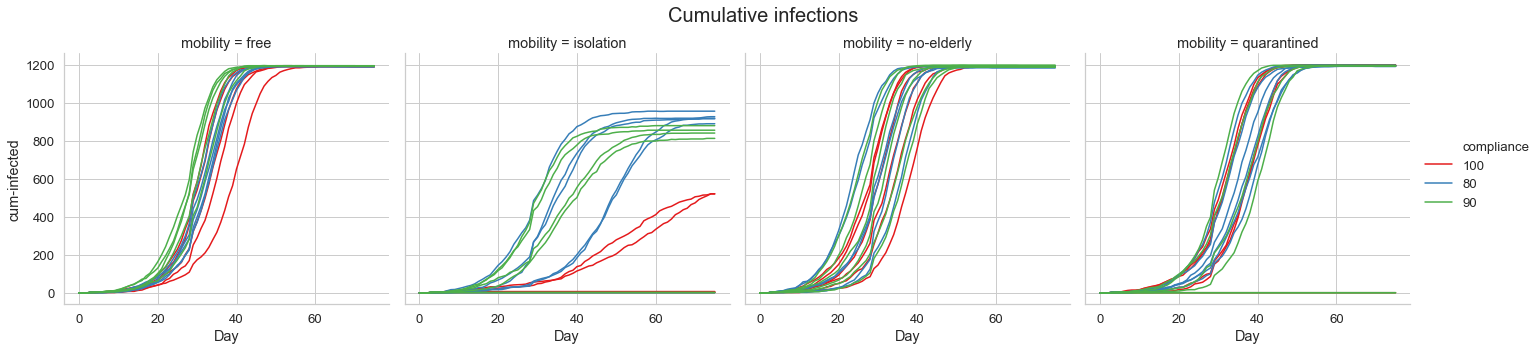

In [345]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_128)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

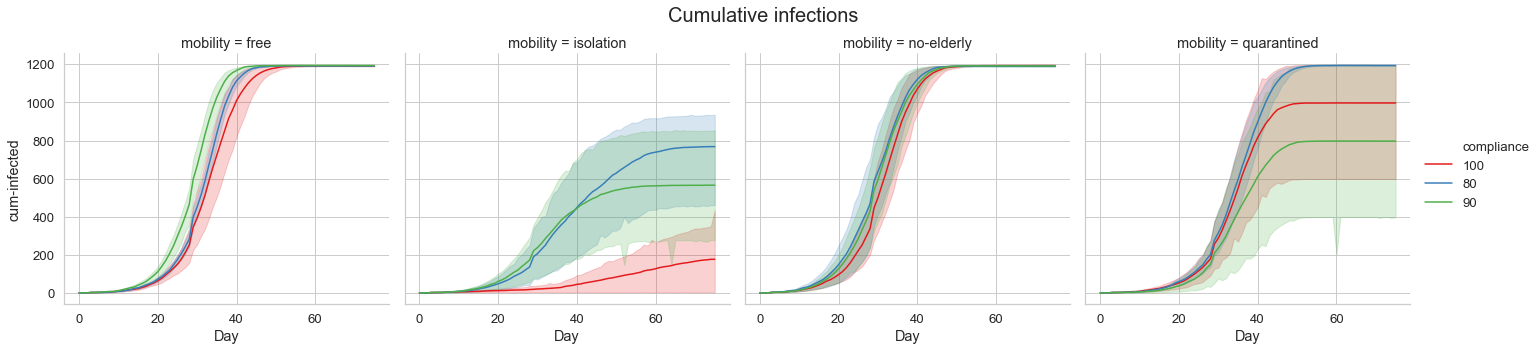

In [346]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'compliance', data = combidf_128)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

### Effect of smaller queue-distance:

- One would expect a larger influence of the small queues during food delivery

**Different variations of 'relplots':**

In [233]:
plotdict['exp1df']['queue-distance'] = 1
plotdict['exp4df']['queue-distance'] = 0.5

In [234]:
combidf_14 = plotdict['exp1df'].append(plotdict['exp4df'])

***Review the difference between 0.5m queue-distance and 1m queue-distance for each mobility:***

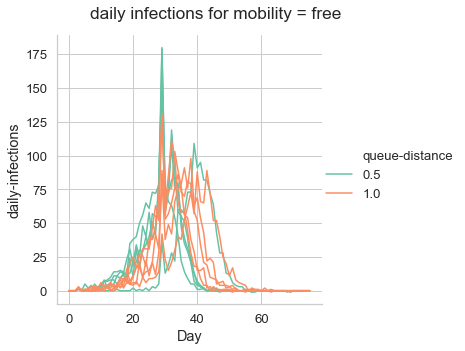

In [235]:
# Daily infections when mobility = 'free'
# Hoe groter de queue-distance, hoe lager de gemiddelde pieken in daily infections
sns.set_style('whitegrid')
selected_mobility = 'free'
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_14.where(combidf_14['mobility'] == selected_mobility))
# g.fig.suptitle('daily infections for 1 mobility') 
g.fig.suptitle('daily infections for mobility = {}'.format(selected_mobility)) #('Mobility = {} (run{})'.format(k,j))
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

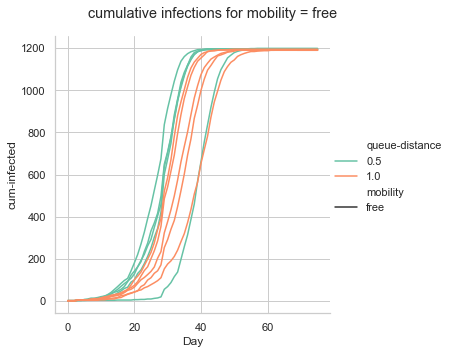

In [236]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()

sns.set(font_scale = 1)
sns.set_style('whitegrid')

selected_mobility = 'free'
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'queue-distance', units = 'run', estimator = None, style = 'mobility', kind = 'line', palette = 'Set2', data = combidf_14.where(combidf_14['mobility'] == selected_mobility))
g.fig.suptitle('cumulative infections for mobility = {}'.format(selected_mobility))
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

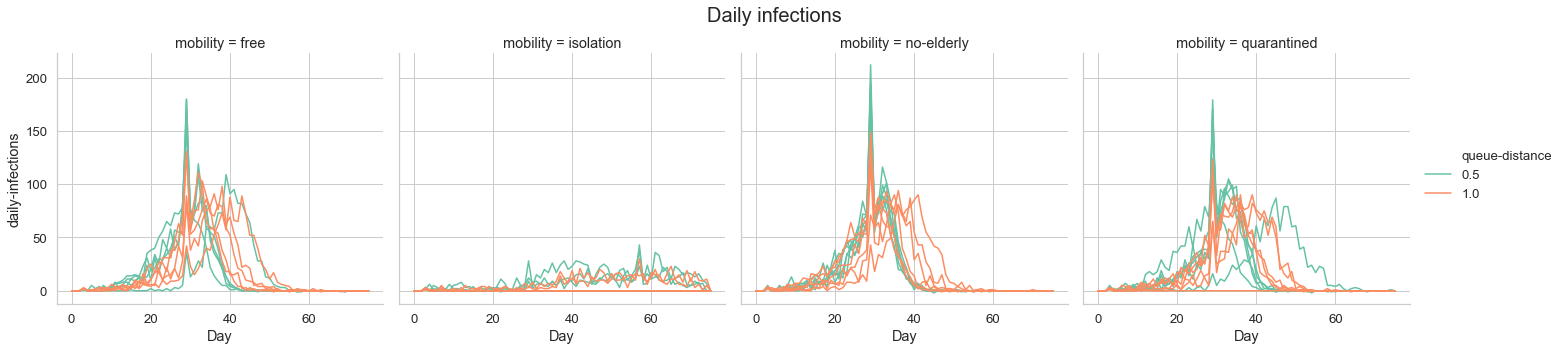

In [237]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_14)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

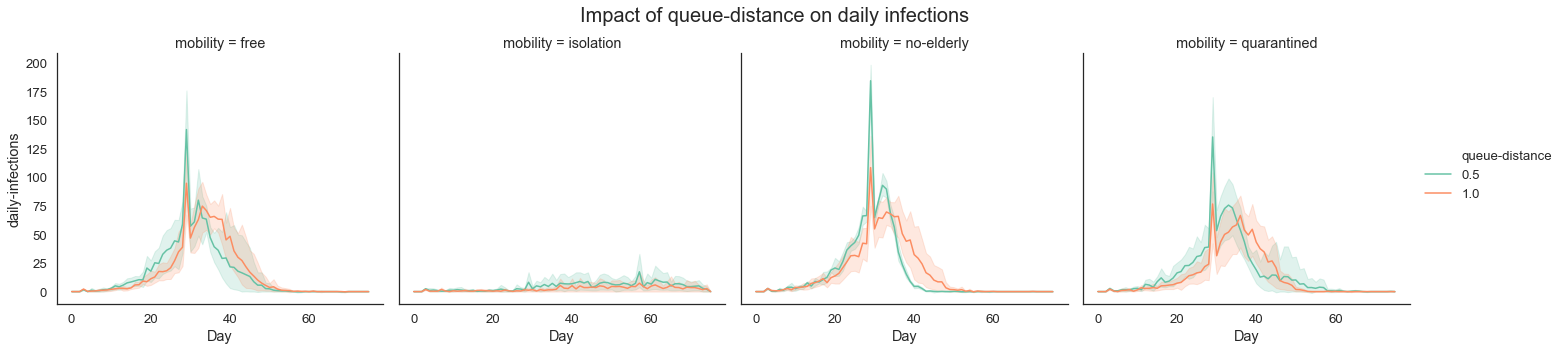

In [238]:
sns.set_style('white')
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_14)
g.fig.suptitle('Impact of queue-distance on daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

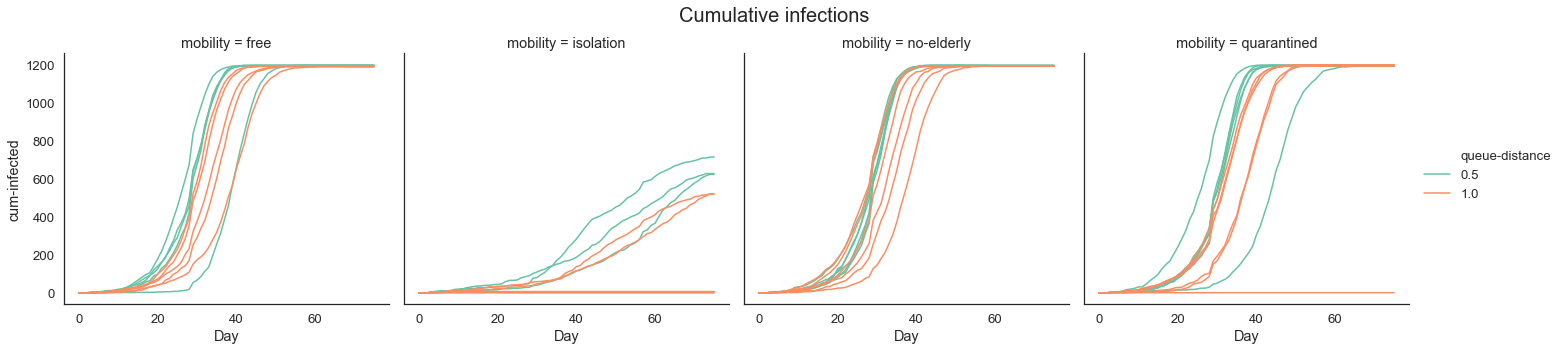

In [239]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_14)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

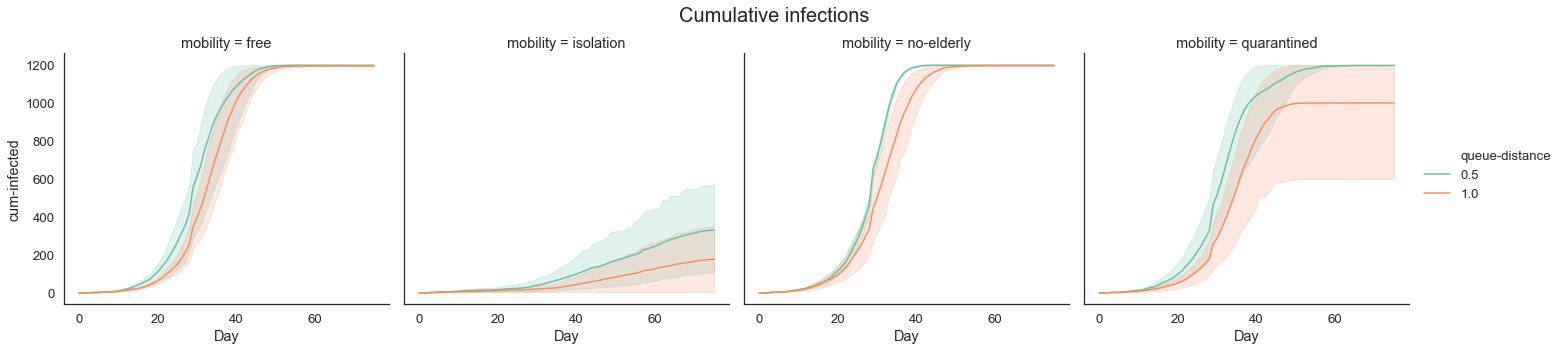

In [240]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_14)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

### Effect of larger queue-distance:

- One would expect a smaller influence of the large queues during food delivery

**Different variations of 'relplots':**

In [242]:
plotdict['exp1df']['queue-distance'] = 1
plotdict['exp3df']['queue-distance'] = 1.5

combidf_13 = plotdict['exp1df'].append(plotdict['exp3df'])


***Review the difference between 1.5m queue-distance and 1m queue-distance for each mobility:***

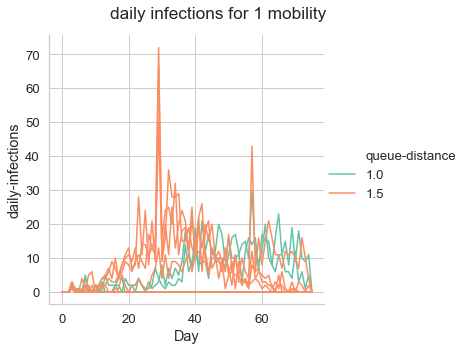

In [243]:
# Daily infections when mobility = 'free'
# Hoe groter de queue-distance, hoe lager de gemiddelde pieken in daily infections
sns.set_style('whitegrid')
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_13.where(combidf_13['mobility'] == 'isolation'))
g.fig.suptitle('daily infections for 1 mobility')
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

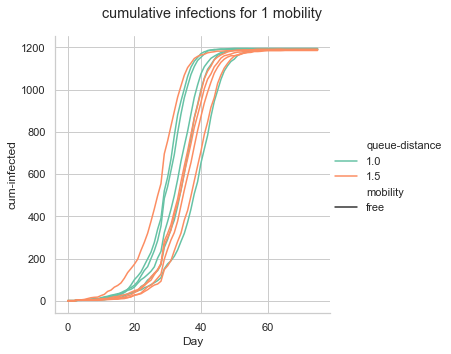

In [244]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()

sns.set(font_scale = 1)
sns.set_style('whitegrid')
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'queue-distance', units = 'run', estimator = None, style = 'mobility', kind = 'line', palette = 'Set2', data = combidf_13.where(combidf_13['mobility'] == 'free'))
g.fig.suptitle('cumulative infections for 1 mobility')
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

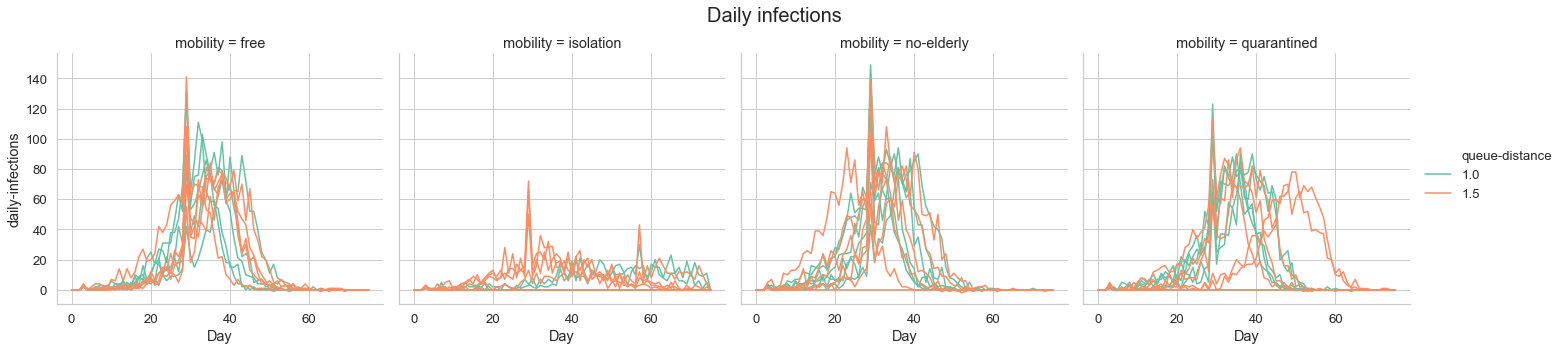

In [245]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_13)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

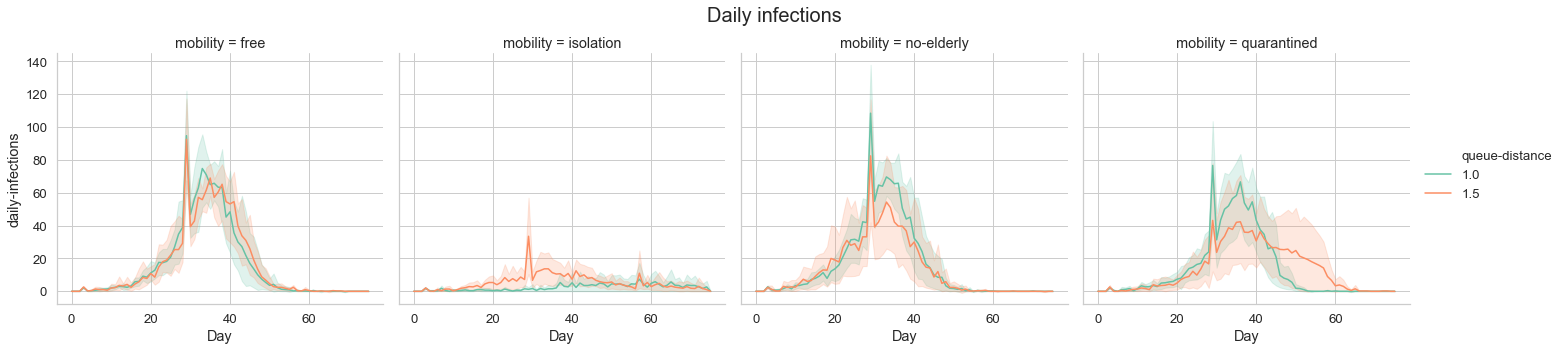

In [246]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_13)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

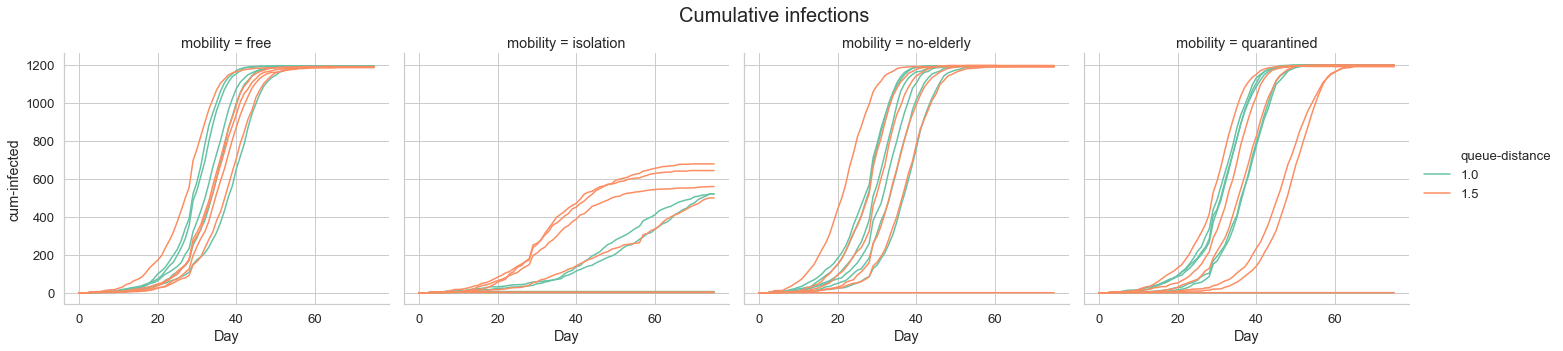

In [247]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_13)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

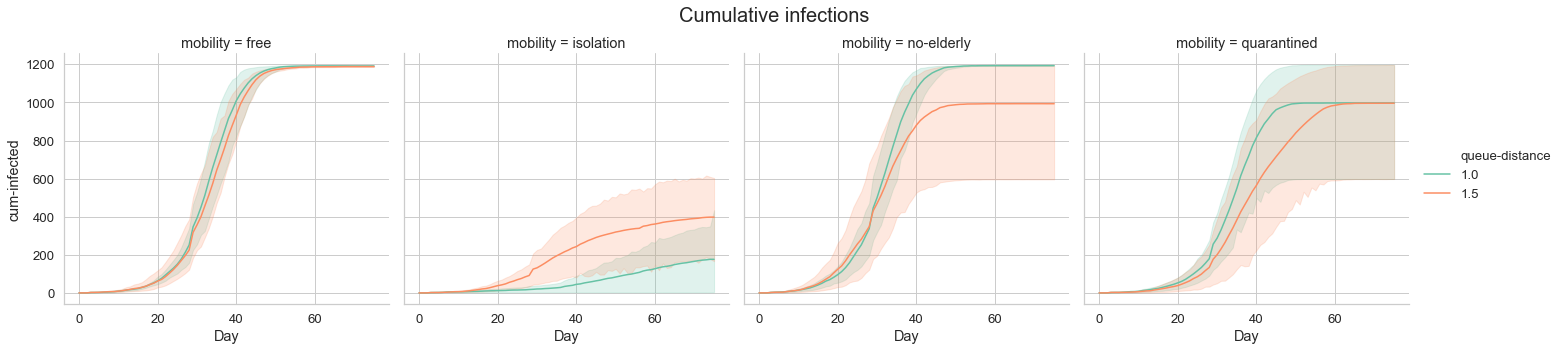

In [248]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_13)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

### Effect of larger and smaller queue-distance:

- One would expect a smaller influence of the large queues during food delivery

**Different variations of 'relplots':**

In [255]:
combidf_134 = plotdict['exp1df'].append([plotdict['exp3df'],plotdict['exp4df']])
combidf_134

index     mobility  run  Day  cum-infected  infected adults  \
0         0         free    1    0             1                0   
1         1         free    1    1             1                0   
2         2         free    1    2             1                0   
3         3         free    1    3             4                2   
4         4         free    1    4             4                2   
...     ...          ...  ...  ...           ...              ...   
1743   1743  quarantined    6   71          1195              478   
1744   1744  quarantined    6   72          1195              478   
1745   1745  quarantined    6   73          1195              478   
1746   1746  quarantined    6   74          1195              478   
1747   1747  quarantined    6   75          1195              478   

      infected children  infected elderly  daily-infections  \
0                     1                 1               0.0   
1                     1                 1               0.0   
2                     1                 1               0.0   
3                     1                 1               3.0   
4                     1                 1               0.0   
...                 ...               ...               ...   
1743                628                89               0.0   
1744                628                89               0.0   
1745                628                89               0.0   
1746                628                89               0.0   
1747                628                89               0.0   

      daily-elderly-infections  daily-adults-infections  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      2.0   
4                          0.0                      0.0   
...                        ...                      ...   
1743                       0.0                      0.0   
1744                       0.0                      0.0   
1745                       0.0                      0.0   
1746                       0.0                      0.0   
1747                       0.0                      0.0   

      daily-children-infections compliance  queue-distance  
0                           0.0        100             1.0  
1                           0.0        100             1.0  
2                           0.0        100             1.0  
3                           0.0        100             1.0  
4                           0.0        100             1.0  
...                         ...        ...             ...  
1743                        0.0        NaN             0.5  
1744                        0.0        NaN             0.5  
1745                        0.0        NaN             0.5  
1746                        0.0        NaN             0.5  
1747                        0.0        NaN             0.5  

[5244 rows x 14 columns]

***Review the difference between 1.5m queue-distance and 1m queue-distance for each mobility:***

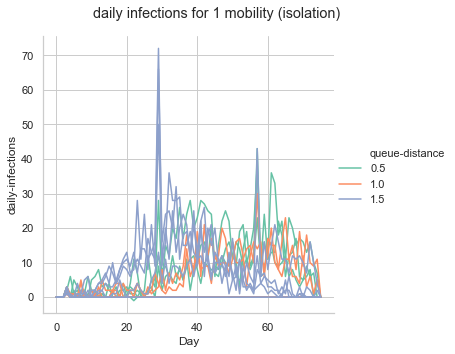

In [256]:
# Daily infections when mobility = 'free'
# Hoe groter de queue-distance, hoe lager de gemiddelde pieken in daily infections
sns.set(font_scale = 1)
sns.set_style('whitegrid')
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_134.where(combidf_134['mobility'] == 'isolation'))
g.fig.suptitle('daily infections for 1 mobility (isolation)')
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

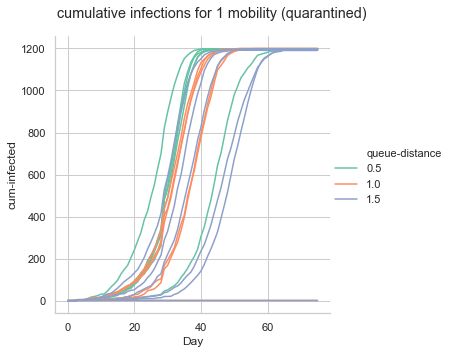

In [257]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()

sns.set(font_scale = 1)
sns.set_style('whitegrid')
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'queue-distance', units = 'run', estimator = None, kind = 'line', palette = 'Set2', data = combidf_134.where(combidf_134['mobility'] == 'quarantined'))
g.fig.suptitle('cumulative infections for 1 mobility (quarantined)')
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

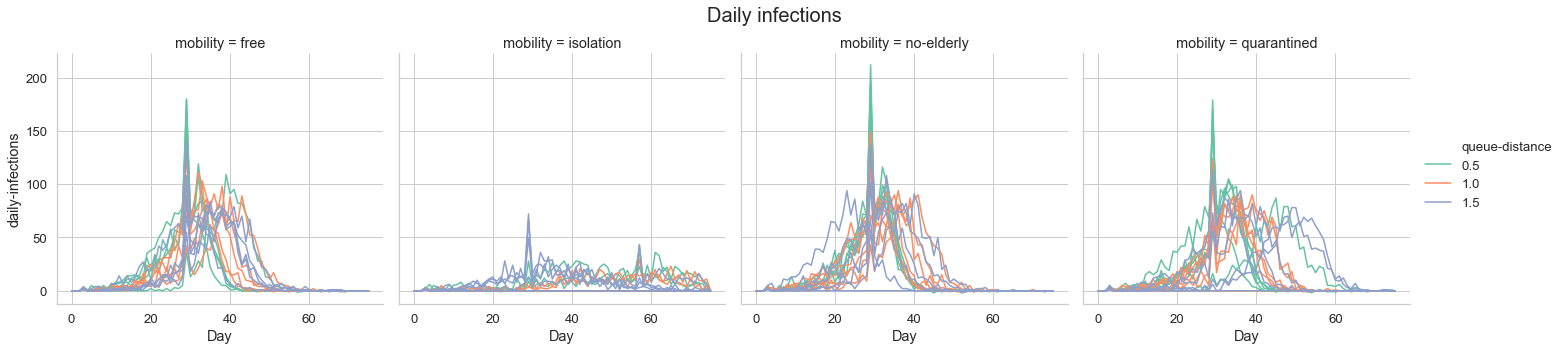

In [258]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'queue-distance', palette = 'Set2', units = 'run', estimator = None, kind = 'line', data = combidf_134)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

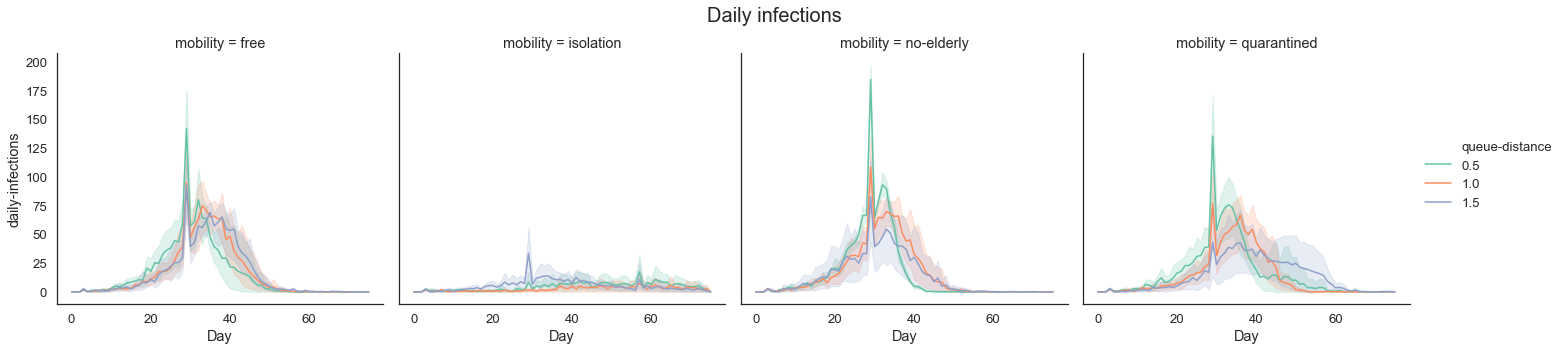

In [259]:
sns.set_style('white')
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_134)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

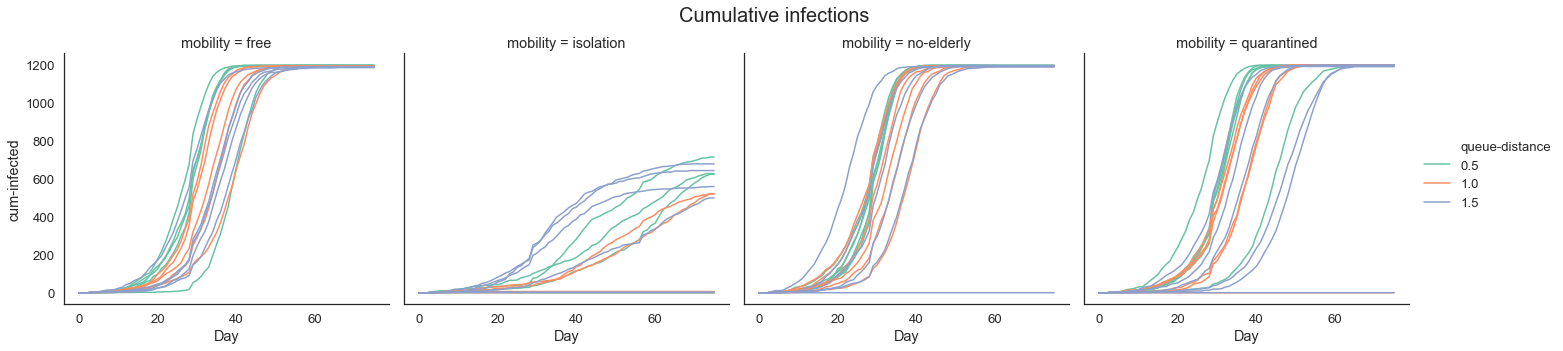

In [260]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_134)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

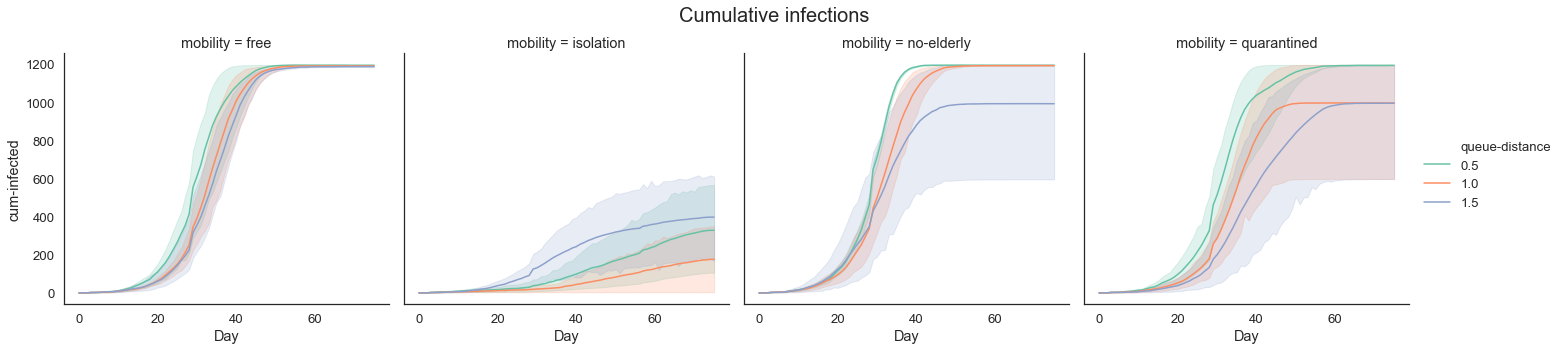

In [261]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set2', hue = 'queue-distance', data = combidf_134)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

### Effect of wearing masks (and compliance):

**Different variations of 'relplots':**

In [263]:
plotdict['exp1df']['Masks'] = 'No'
plotdict['exp7df']['Masks'] = 'Yes'
plotdict['exp8df']['Masks'] = '90%'

combidf_17 = plotdict['exp1df'].append(plotdict['exp7df'])

combidf_78 = plotdict['exp7df'].append(plotdict['exp8df'])

combidf_178 = combidf_17.append(plotdict['exp8df'])

***Review the difference between masks and no-masks for each mobility:***

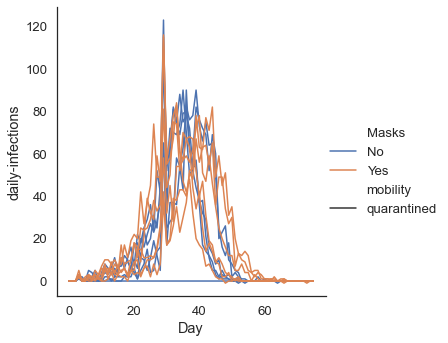

In [266]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_17.where(combidf_17['mobility'] == 'quarantined'))


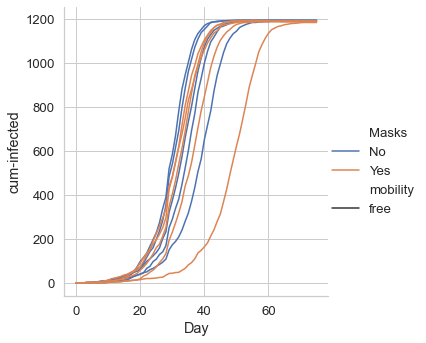

In [268]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_17.where(combidf_17['mobility'] == 'free'))


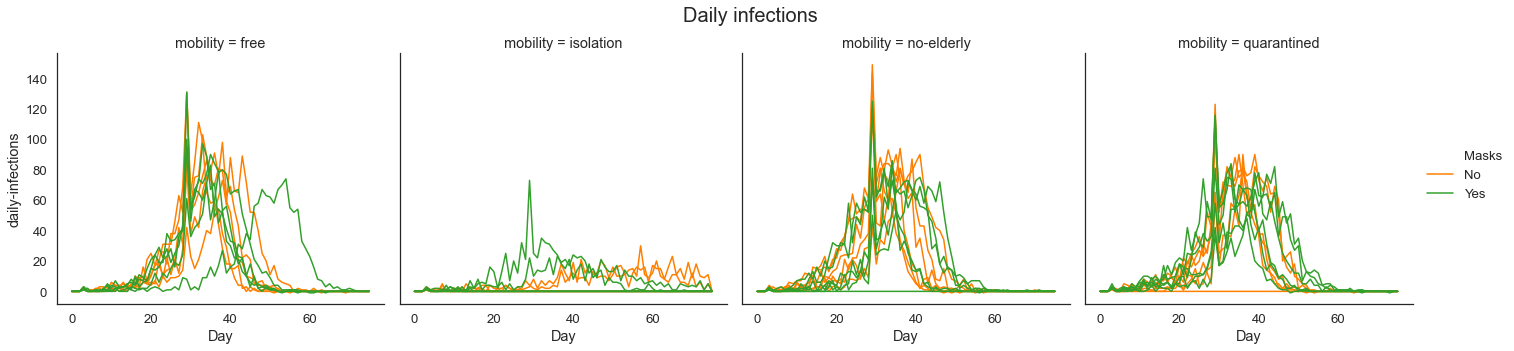

In [269]:
sns.set(font_scale = 1.2)
sns.set_style('white')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'Masks', palette = 'Paired_r', units = 'run', estimator = None, kind = 'line', data = combidf_17)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

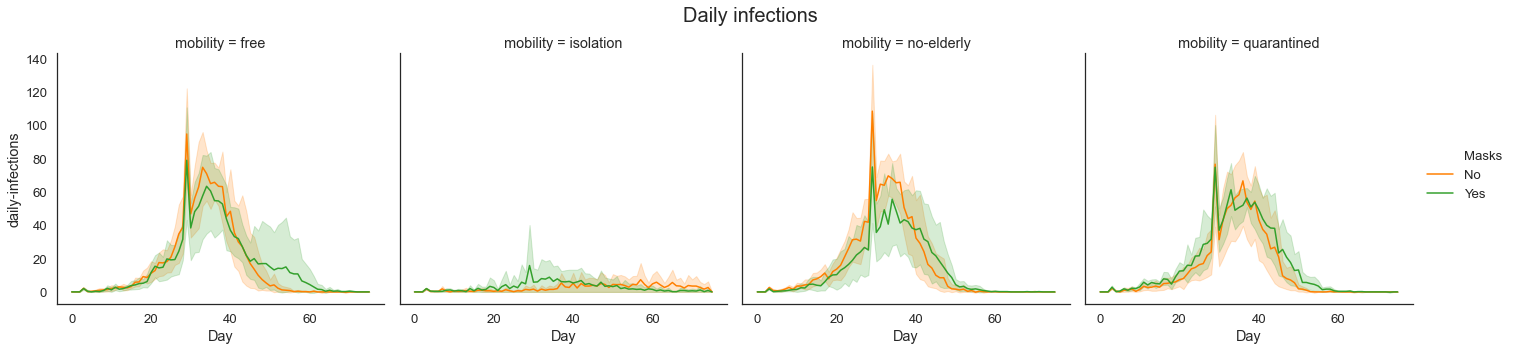

In [270]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_17)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

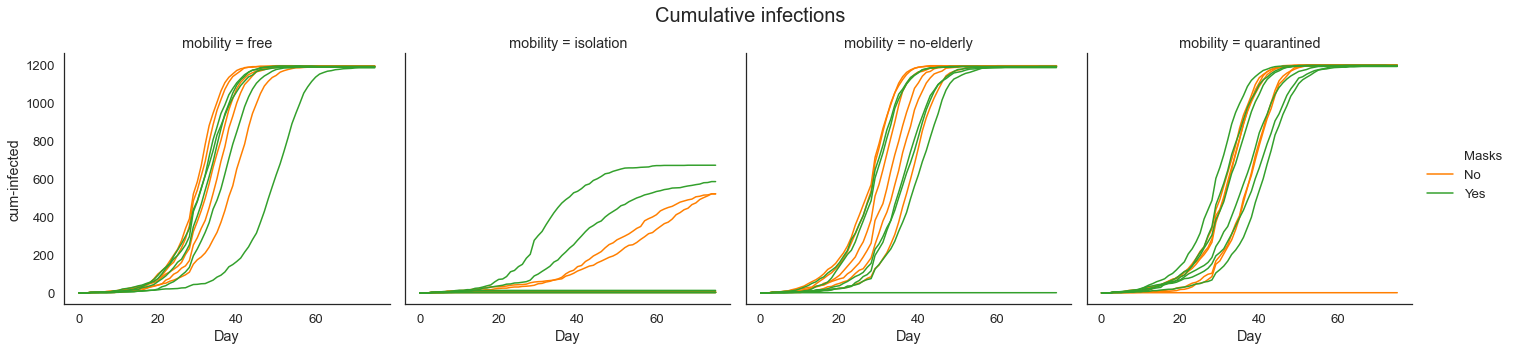

In [272]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_17)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

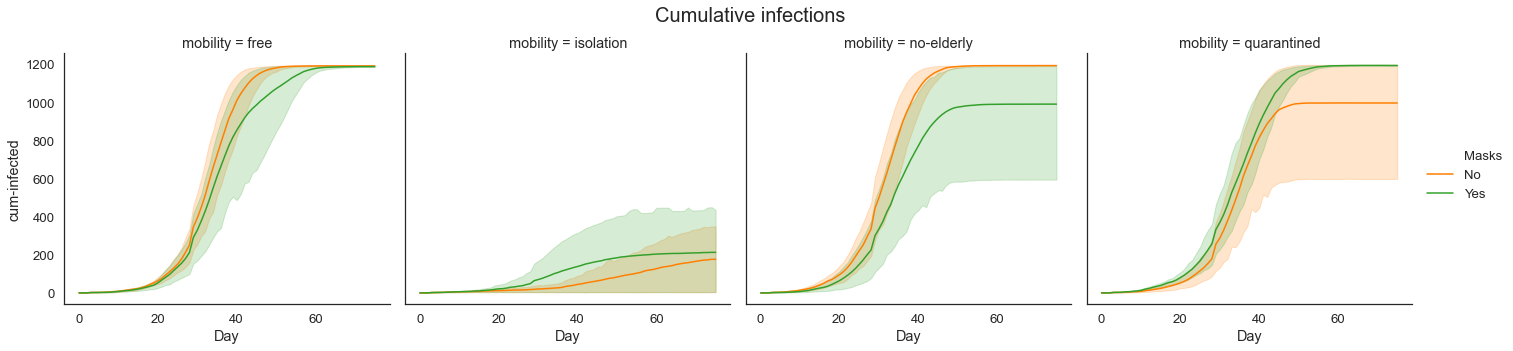

In [273]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_17)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

***Review the difference between masks with 100% compliance and masks with 90% compliance for each mobility:***

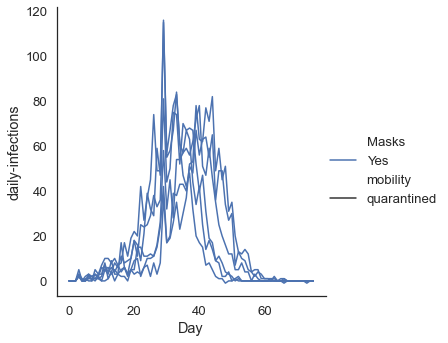

In [274]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_78.where(combidf_78['mobility'] == 'quarantined'))


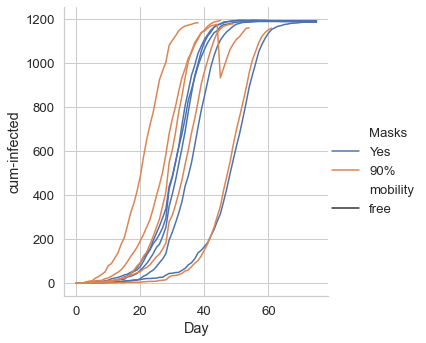

In [275]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_78.where(combidf_78['mobility'] == 'free'))


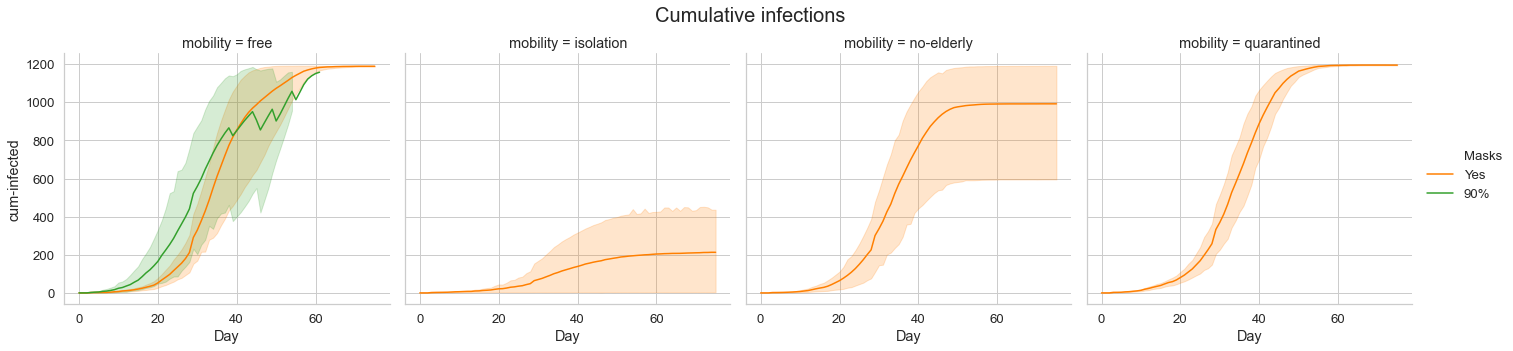

In [276]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_78)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

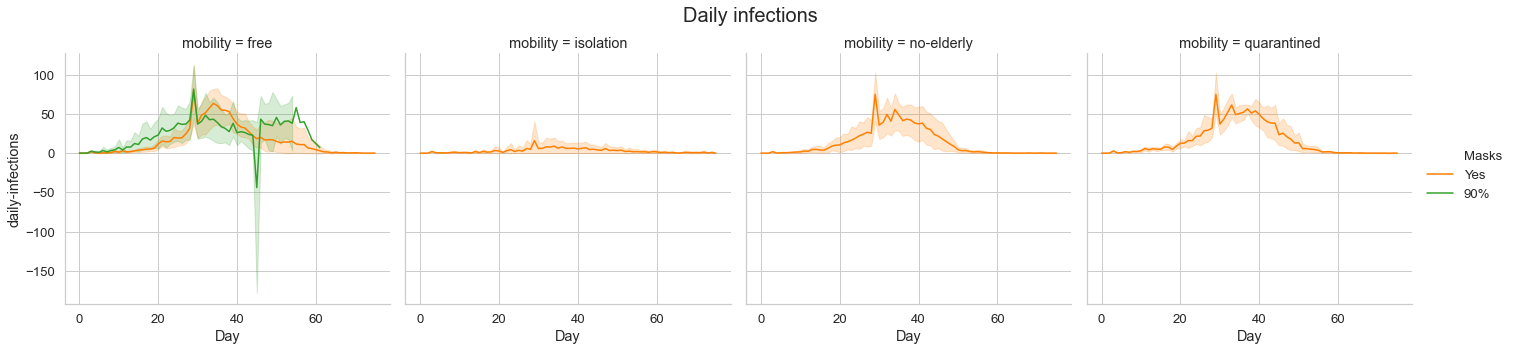

In [277]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_78)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

***Review the difference between no masks / masks (100%) / masks (90%) for each mobility:***

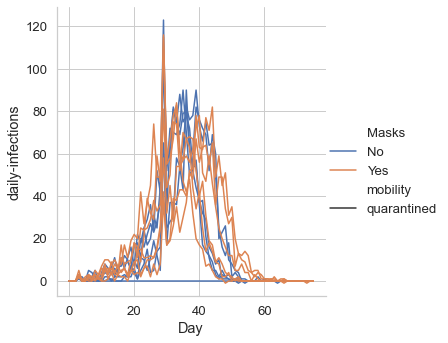

In [278]:
# Daily infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_178.where(combidf_178['mobility'] == 'quarantined'))


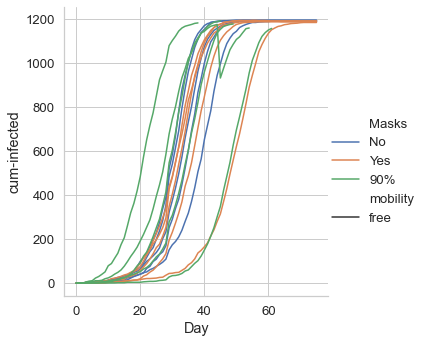

In [279]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()
sns.set_style("whitegrid")
# sns.set(font_scale = 1)
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'Masks', units = 'run', estimator = None, style = 'mobility', kind = 'line', data = combidf_178.where(combidf_178['mobility'] == 'free'))


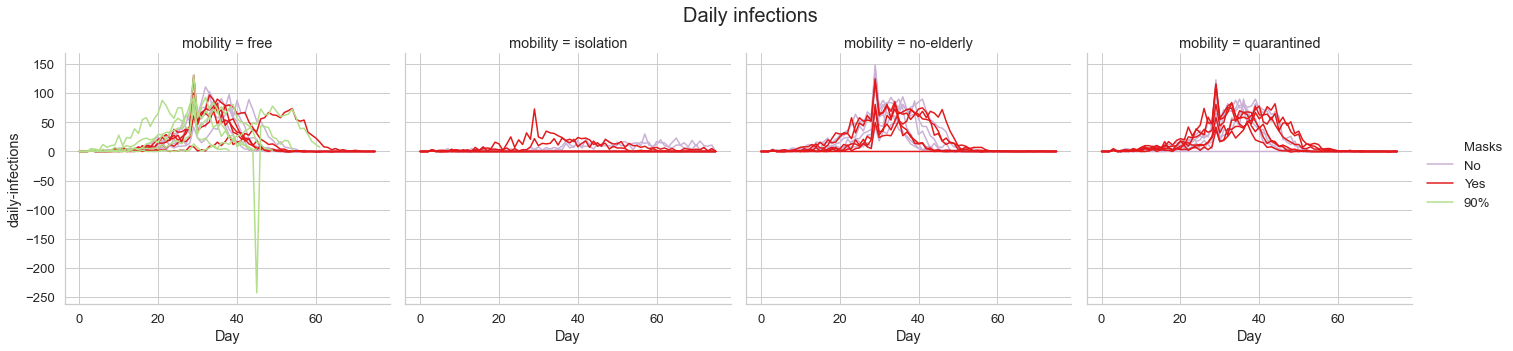

In [280]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'Masks', palette = 'Paired_r', units = 'run', estimator = None, kind = 'line', data = combidf_178)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

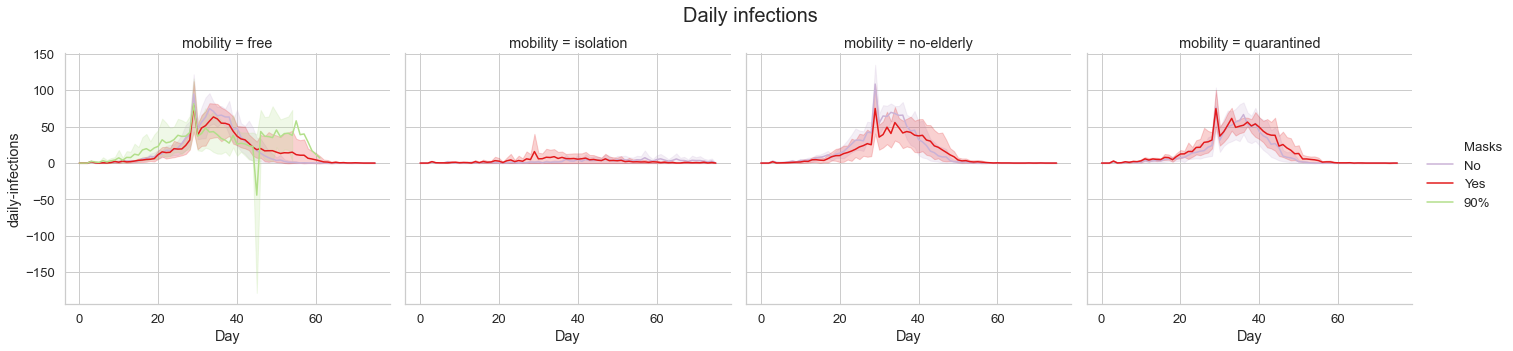

In [281]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_178)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

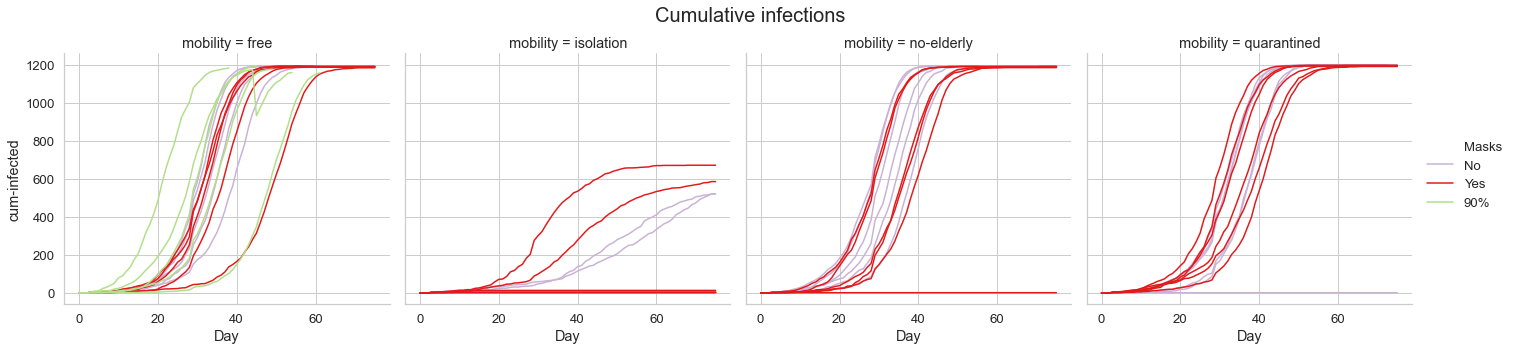

In [282]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_178)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

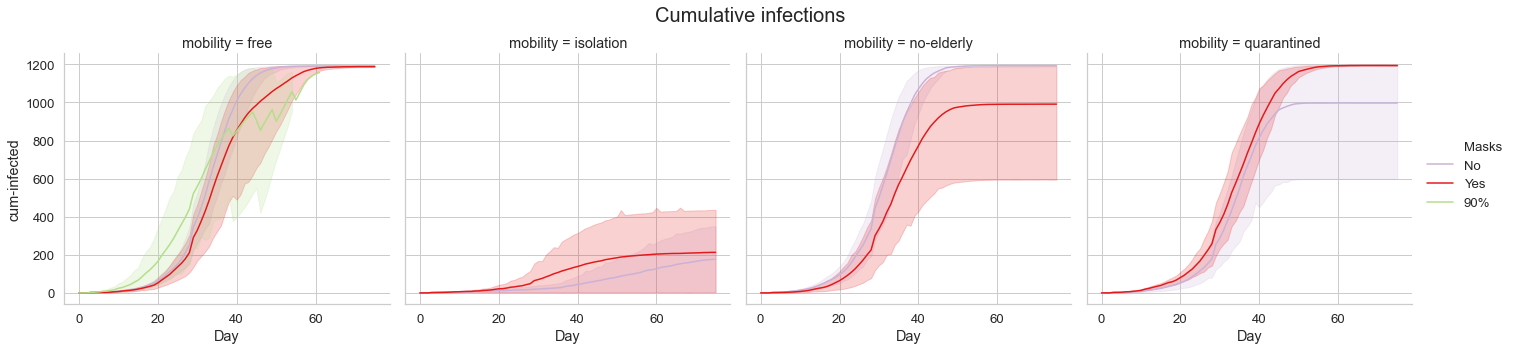

In [283]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Paired_r', hue = 'Masks', data = combidf_178)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

# TO MAKE:

### Create subplots of people in COVID-care (under exp1 mobility restrictions):

First, the data has to be changed to make a DF with the number of people in specialized care

**Different variations of 'relplots':**

In [284]:
g = sns.relplot(x = 'Day', y = 'bed-capacity',hue = 'mobility', units = 'run', estimator = None, kind = 'line', data = plotDF12)
#units defines that you have multiple samples (runs), hence creates separate lines for them.

NameError: name 'plotDF12' is not defined

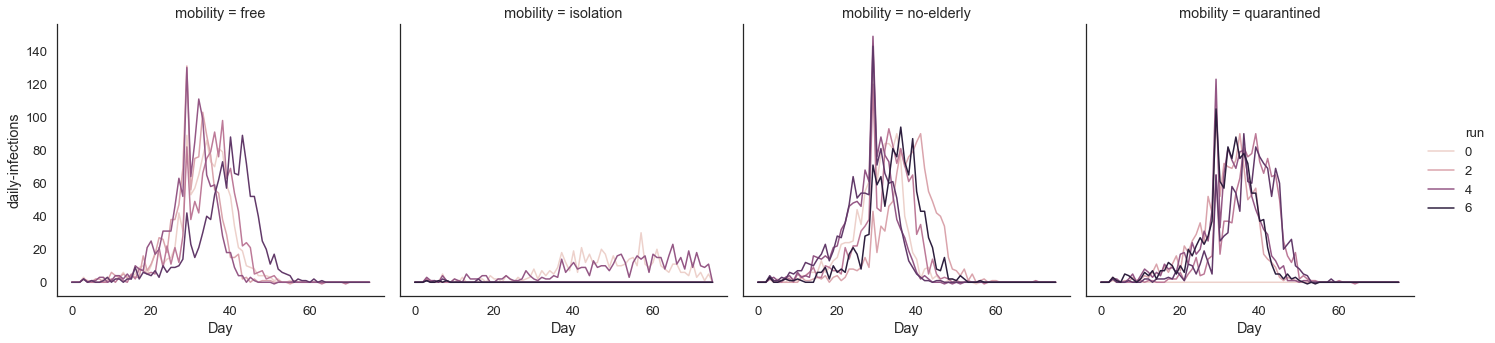

In [107]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'run', estimator = None, kind = 'line', data = plotDF12)


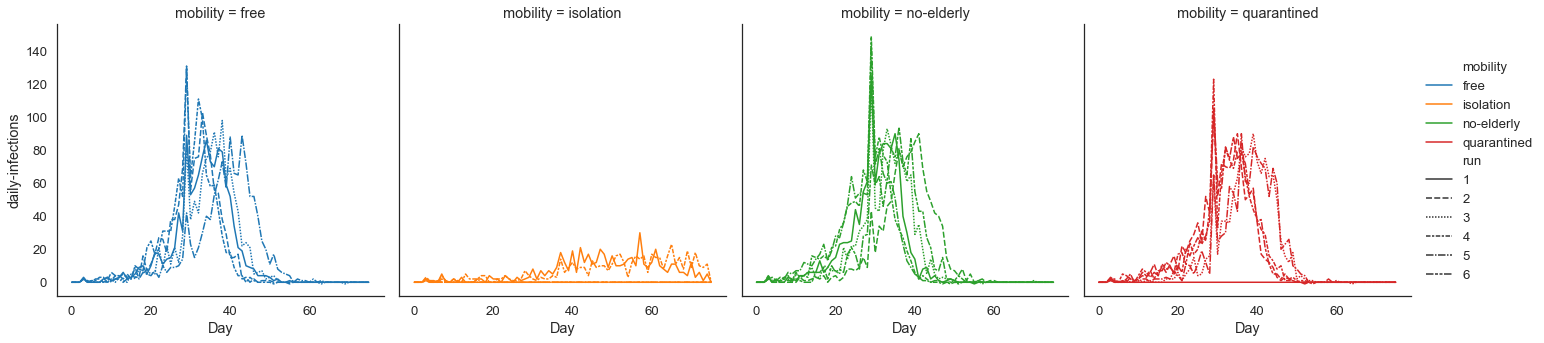

In [108]:
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', style = 'run', hue = 'mobility', data = plotDF12)
# , col_wrap = 2

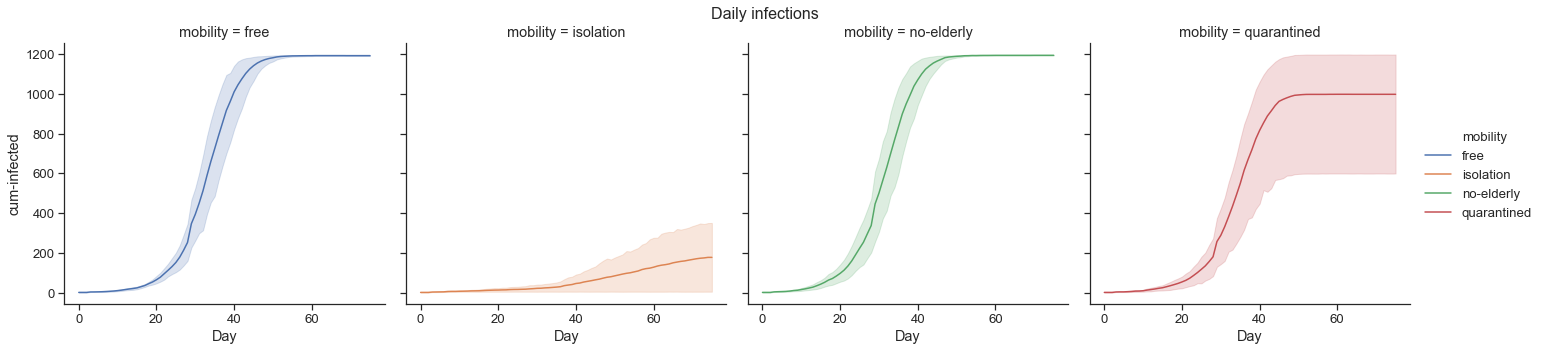

In [233]:
sns.set_context('notebook', font_scale = 1.2)
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', hue = 'mobility', data = plotDF12)
g.fig.suptitle('Daily infections', fontsize=16)


g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

**To create a similar plot, but then with data about the age groups, the dataset has to be reshaped.**

- Create a dataset with columns: run | Day | mobility | data | dataype
- Plot *data* with hue = *datatype*


- anything can be filled in for mobility | data | dataype

In [110]:
m1 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-infections'],
            var_name = 'datatype',value_name = 'data')
m2 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m5 = m1.append([m2, m3, m4])
m5.head()

run  Day mobility          datatype  data
0    1    0     free  daily-infections   0.0
1    1    1     free  daily-infections   0.0
2    1    2     free  daily-infections   0.0
3    1    3     free  daily-infections   3.0
4    1    4     free  daily-infections   0.0

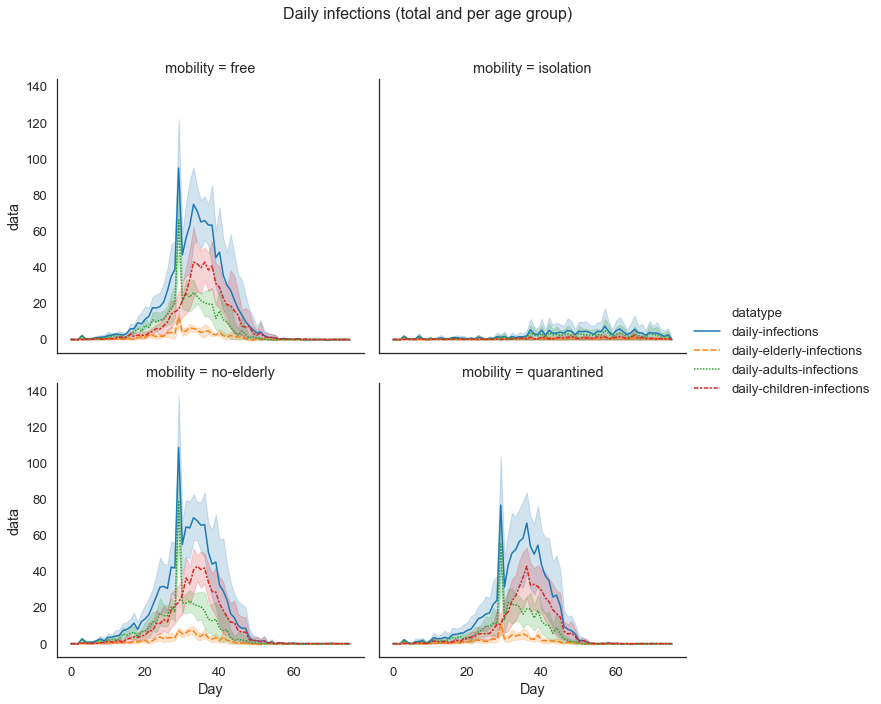

In [111]:
g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m5)
g.fig.suptitle('Daily infections (total and per age group)', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

En zonder de total daily infections:

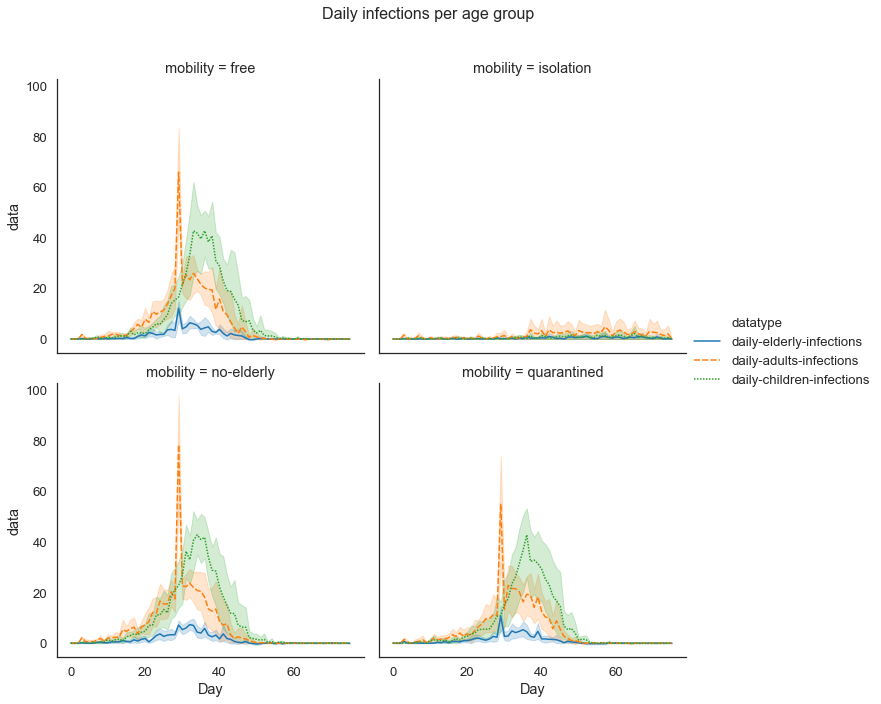

In [112]:
m2 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m5 = m2.append([m3, m4])
m5.head()

sns.set_context ('notebook', font_scale = 1.2)

g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m5)
g.fig.suptitle('Daily infections per age group', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

In [222]:
sns.set_context ('notebook', font_scale = 1.2)


***Kan ik een stacked bar chart maken voor adults/elderly/children?***

I can create a stacked area chart for 1 run:

76
76


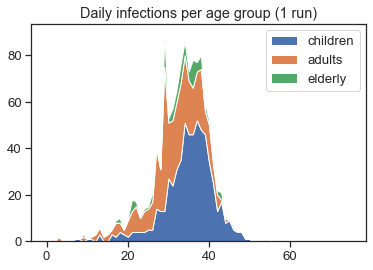

In [223]:
# g = sns.FacetGrid(df1run, col='mobility',hue = 'mobility') #This would make multiple plots
df1run = plotDF12.where(plotDF12['run'] == 1).dropna()

y1 = df1run['daily-children-infections'].where(df1run['mobility'] == 'free').dropna()
y2 = df1run['daily-adults-infections'].where(df1run['mobility'] == 'free').dropna()
y3 = df1run['daily-elderly-infections'].where(df1run['mobility'] == 'free').dropna()
# y4 = df1run['daily-elderly-infections'].where(df1run['mobility'] == 'no-elderly').dropna()
# x = df1run['Day'].where(df1run['mobility'] == 'free').dropna()
print(len(y1))
print(len(x))
# x = range(0,51)
x = df1run['Day'].unique()
len(x)

plt.stackplot(x, y1, y2, y3, labels = ['children','adults','elderly'])
plt.legend()
plt.title('Daily infections per age group (1 run)')
plt.show()
# plt.stackplot(x, y1, y2, y3)

Combining the above two in one for-loop for each mobility type, for 1 run

- Should be possible for average over runs as well

***This looks nice, but might be more useful for the cumulative infections. 
I could use plotDFx2 for this, but I use a separate one (plotDFx5), keeping the daily and cumulative infections separate:***

In [314]:
plotDF14 = exp1df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
plotDF15 = plotDF14.reset_index()
plotDF15

plotDF24 = exp2df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
plotDF25 = plotDF24.reset_index()
plotDF25

# plotDF34 = exp3df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF35 = plotDF34.reset_index()
# plotDF35

# plotDF44 = exp4df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
# plotDF45 = plotDF44.reset_index()
# plotDF45

plotDF74 = exp7df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
plotDF75 = plotDF74.reset_index()
plotDF75

plotDF84 = exp8df.pivot_table(values = ['cum-infected','infected elderly','infected children','infected adults'], index = ['mobility','run','Day'], aggfunc = np.max)
plotDF85 = plotDF84.reset_index()
plotDF85

mobility  run  Day  cum-infected  infected adults  infected children  \
0       free    1    0             1                1                  1   
1       free    1    1             1                1                  1   
2       free    1    2             1                1                  1   
3       free    1    3             4                2                  1   
4       free    1    4             7                5                  1   
..       ...  ...  ...           ...              ...                ...   
247     free    5   45          1153              474                592   
248     free    5   46          1166              479                600   
249     free    5   47          1171              479                605   
250     free    5   48          1175              479                609   
251     free    5   49          1177              479                611   

     infected elderly  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
247                87  
248                87  
249                87  
250                87  
251                87  

[252 rows x 7 columns]

<Figure size 1440x360 with 0 Axes>

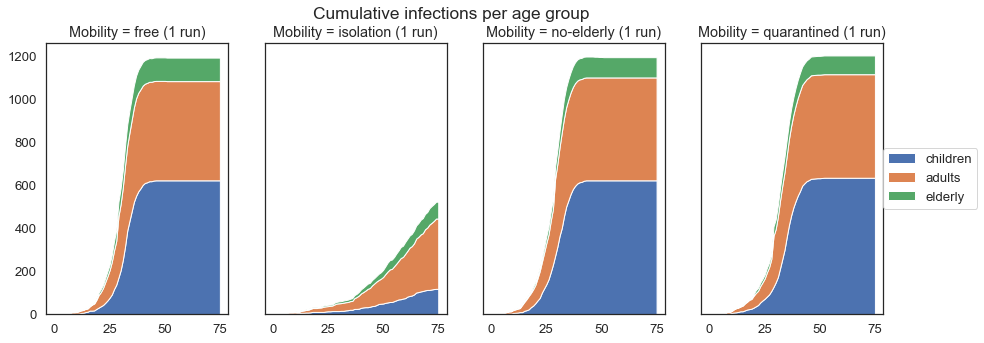

In [239]:
# Cumulative infections per age group for 1 run:
df1run = plotDF15.where(plotDF15['run'] == 4 ).dropna()

mobilitylist = list (df1run['mobility'].unique())
fig = plt.figure(figsize = (20,5))
fig, axes = plt.subplots(1,4, sharey = True)


for i in range(len(mobilitylist)):
    k = mobilitylist[i]
    x = df1run['Day'].unique()
    y1 = df1run['infected children'].where(df1run['mobility'] == k).dropna()
    y2 = df1run['infected adults'].where(df1run['mobility'] == k).dropna()
    y3 = df1run['infected elderly'].where(df1run['mobility'] == k).dropna()
    y = [y1,y2,y3]
    axes[i].stackplot(x, y, labels = ['children','adults','elderly'])
    axes[i].set_title('Mobility = {} (1 run)'.format(k))

    plt.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1,0.5), loc='center left', borderaxespad=0)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.suptitle('Cumulative infections per age group')
# plt.tight_layout()
plt.show()


In [174]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.])

<Figure size 1440x360 with 0 Axes>

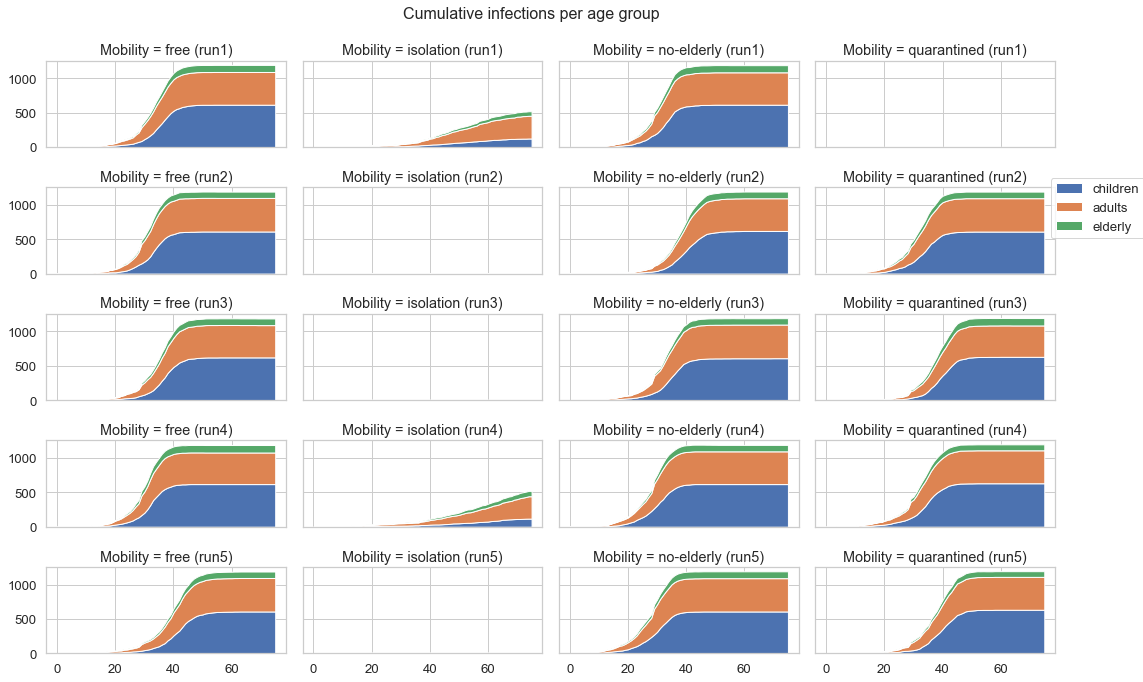

In [195]:
# Cumulative infections for age groups for all runs separately plotted
# df1run = plotDF15.where(plotDF15['run'] == 1).dropna()
sns.set_style('whitegrid')


mobilitylist = list (plotDF15['mobility'].unique())
fig = plt.figure(figsize = (20,5))
fig, axes = plt.subplots(5,4, sharey = True, sharex = True)



# for j in plotDF15['run'].unique():
for j in range(1,6):
    df1run = plotDF15.where(plotDF15['run'] == j).dropna()
    for i in range(len(mobilitylist)):
        k = mobilitylist[i]
        x = df1run['Day'].unique()
        y1 = df1run['infected children'].where(df1run['mobility'] == k).dropna()
        y2 = df1run['infected adults'].where(df1run['mobility'] == k).dropna()
        y3 = df1run['infected elderly'].where(df1run['mobility'] == k).dropna()
        y = [y1,y2,y3]
        axes[(j-1),i].set_title('Mobility = {} (run{})'.format(k,j))
        axes[(j-1),i].stackplot(x, [y1,y2,y3], labels = ['children','adults','elderly'])

fig.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1.06,0.7), loc='upper right', borderaxespad=0)
fig.set_figheight(10)
fig.set_figwidth(15)
# plt.subplots_adjust(top=0.85)
plt.suptitle('Cumulative infections per age group', fontsize = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [117]:
plotDF12

index     mobility  run  Day  cum-infected  infected adults  \
0         0         free    1    0             1                0   
1         1         free    1    1             1                0   
2         2         free    1    2             1                0   
3         3         free    1    3             4                2   
4         4         free    1    4             4                2   
...     ...          ...  ...  ...           ...              ...   
1743   1743  quarantined    6   71          1196              477   
1744   1744  quarantined    6   72          1196              477   
1745   1745  quarantined    6   73          1196              477   
1746   1746  quarantined    6   74          1196              477   
1747   1747  quarantined    6   75          1196              477   

      infected children  infected elderly  daily-infections  \
0                     1                 1               0.0   
1                     1                 1               0.0   
2                     1                 1               0.0   
3                     1                 1               3.0   
4                     1                 1               0.0   
...                 ...               ...               ...   
1743                618               101               0.0   
1744                618               101               0.0   
1745                618               101               0.0   
1746                618               101               0.0   
1747                618               101               0.0   

      daily-elderly-infections  daily-adults-infections  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      2.0   
4                          0.0                      0.0   
...                        ...                      ...   
1743                       0.0                      0.0   
1744                       0.0                      0.0   
1745                       0.0                      0.0   
1746                       0.0                      0.0   
1747                       0.0                      0.0   

      daily-children-infections  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  
...                         ...  
1743                        0.0  
1744                        0.0  
1745                        0.0  
1746                        0.0  
1747                        0.0  

[1748 rows x 12 columns]

In [187]:
# df1run = plotDF15.where(plotDF15['run'] == 1).dropna()
plotDF12['run'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [188]:
for j in plotDF12['run'].unique():
    df1run = plotDF12.where(plotDF12['run'] == j).dropna()
    for i in range(len(mobilitylist)):
        print(i,j)

0 1
1 1
2 1
3 1
0 2
1 2
2 2
3 2
0 3
1 3
2 3
3 3
0 4
1 4
2 4
3 4
0 5
1 5
2 5
3 5
0 6
1 6
2 6
3 6


<Figure size 1440x432 with 0 Axes>

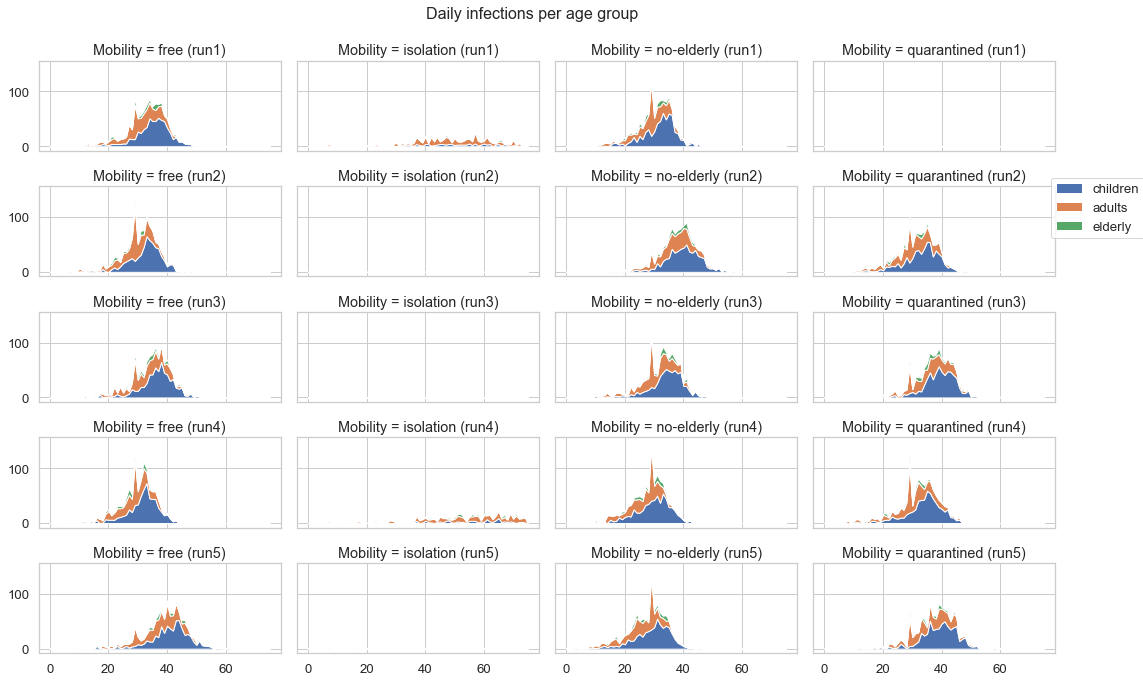

In [193]:
# Daily infections per age group for 5 runs:
mobilitylist = list(plotDF12['mobility'].unique())

fig = plt.figure(figsize = (20,6))
fig, axes = plt.subplots(5,4, sharey = True, sharex = True)

# for j in plotDF12['run'].unique():
for j in range(1,6):
    df1run = plotDF12.where(plotDF12['run'] == j).dropna()
    for i in range(len(mobilitylist)):
        k = mobilitylist[i]
        x = df1run['Day'].unique()
        y1 = df1run['daily-children-infections'].where(df1run['mobility'] == k).dropna()
        y2 = df1run['daily-adults-infections'].where(df1run['mobility'] == k).dropna()
        y3 = df1run['daily-elderly-infections'].where(df1run['mobility'] == k).dropna()
        y = [y1,y2,y3]
        axes[j-1,i].stackplot(x, y, labels = ['children','adults','elderly'])
        axes[j-1,i].set_title('Mobility = {} (run{})'.format(k,j))

fig.legend(labels = ['children','adults','elderly'], bbox_to_anchor=(1.06,0.7), loc='upper right', borderaxespad=0)
fig.set_figheight(10)
fig.set_figwidth(15)
# plt.subplots_adjust(top=0.85)
plt.suptitle('Daily infections per age group', fontsize = 16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Effect of 20% elderly :

-Curious to see the number of infections, especially in the no-elderly experiments.

**Different variations of 'relplots':**

In [76]:
plotDF12['elderly %'] = 10
plotDF92['elderly %'] = 20

plotDF15['elderly %'] = 10
plotDF95['elderly %'] = 20

In [77]:
combidf_19daily = plotDF12.append(plotDF92)
combidf_19daily

combidf_19cum = plotDF15.append(plotDF95)
combidf_19cum

mobility  run  Day  cum-infected  infected adults  infected children  \
0            free    1    0             1                0                  1   
1            free    1    1             1                0                  1   
2            free    1    2             1                0                  1   
3            free    1    3             4                2                  1   
4            free    1    4             4                2                  1   
...           ...  ...  ...           ...              ...                ...   
1743  quarantined    6   71          1194              384                571   
1744  quarantined    6   72          1194              384                571   
1745  quarantined    6   73          1194              384                571   
1746  quarantined    6   74          1194              384                571   
1747  quarantined    6   75          1194              384                571   

      infected elderly  elderly %  
0                    1         10  
1                    1         10  
2                    1         10  
3                    1         10  
4                    1         10  
...                ...        ...  
1743               239         20  
1744               239         20  
1745               239         20  
1746               239         20  
1747               239         20  

[3496 rows x 8 columns]

***Review the difference between 20% elderly and 10% elderly for each mobility:***

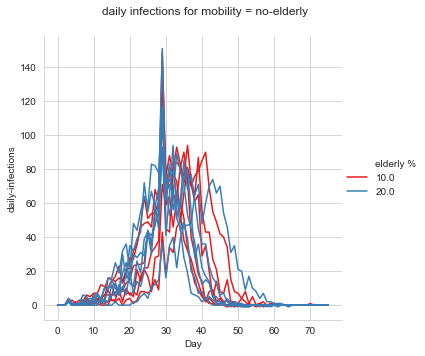

In [79]:
# Daily infections when mobility = 'free'
# Hoe groter de queue-distance, hoe lager de gemiddelde pieken in daily infections
sns.set_style('whitegrid')
selected_mobility = 'no-elderly'
g = sns.relplot(x = 'Day', y = 'daily-infections', hue = 'elderly %', palette = 'Set1', units = 'run', estimator = None, kind = 'line', data = combidf_19daily.where(combidf_19daily['mobility'] == selected_mobility))
# g.fig.suptitle('daily infections for 1 mobility') 
g.fig.suptitle('daily infections for mobility = {}'.format(selected_mobility)) #('Mobility = {} (run{})'.format(k,j))
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

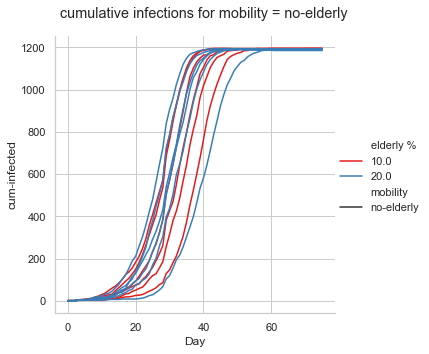

In [80]:
# Cumulative infections
# Hoe hoger de compliance, hoe hoger de piek na de food delivery, en hoe lager dus daarvoor.
# sns.reset_orig()

sns.set(font_scale = 1)
sns.set_style('whitegrid')

selected_mobility = 'no-elderly'
g = sns.relplot(x = 'Day', y = 'cum-infected', hue = 'elderly %', units = 'run', estimator = None, style = 'mobility', kind = 'line', palette = 'Set1', data = combidf_19cum.where(combidf_19cum['mobility'] == selected_mobility))
g.fig.suptitle('cumulative infections for mobility = {}'.format(selected_mobility))
g.fig.subplots_adjust(top=0.9) # moves the subplots down a little bit, creating space for the title.

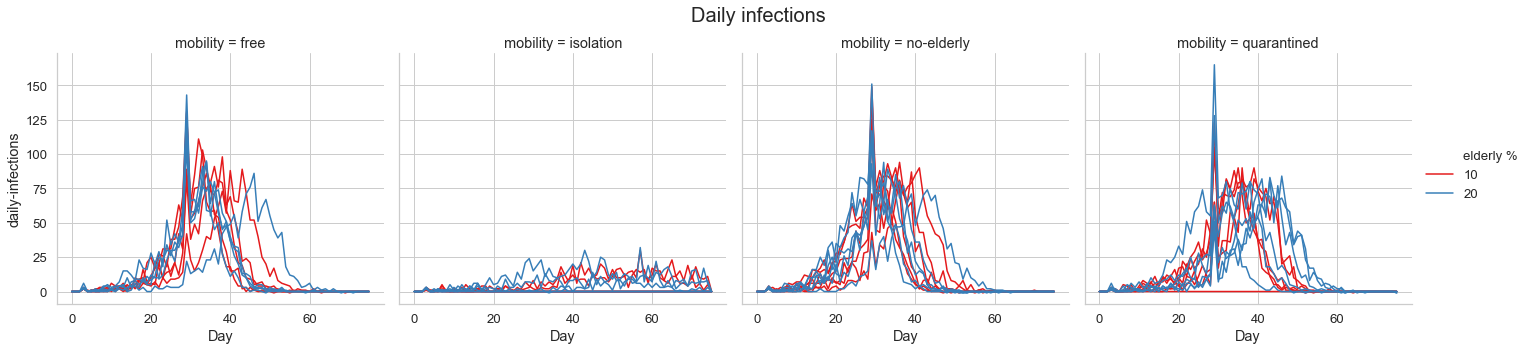

In [81]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility', hue = 'elderly %', palette = 'Set1', units = 'run', estimator = None, kind = 'line', data = combidf_19daily)
g.fig.suptitle('Daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

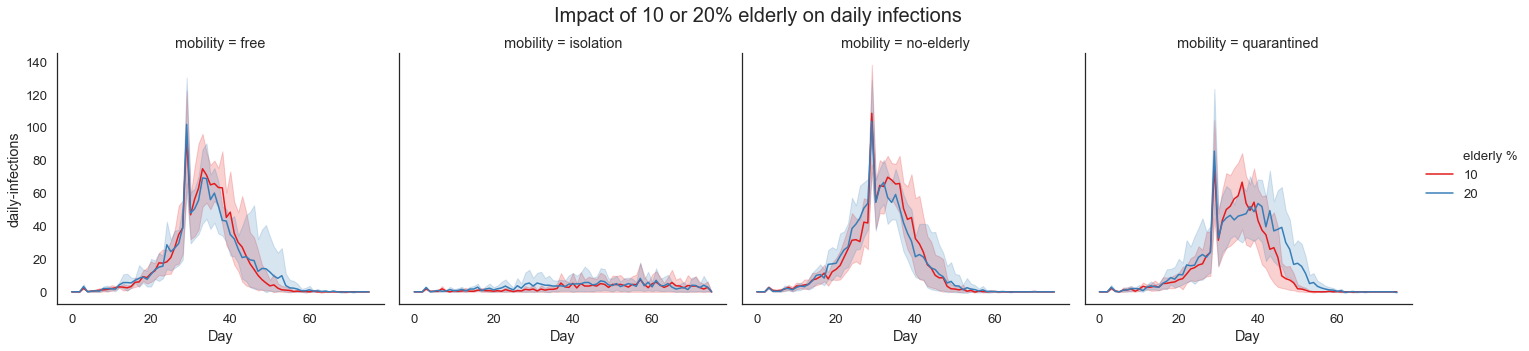

In [82]:
sns.set_style('white')
g = sns.relplot(x = 'Day', y = 'daily-infections',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'elderly %', data = combidf_19daily)
g.fig.suptitle('Impact of 10 or 20% elderly on daily infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

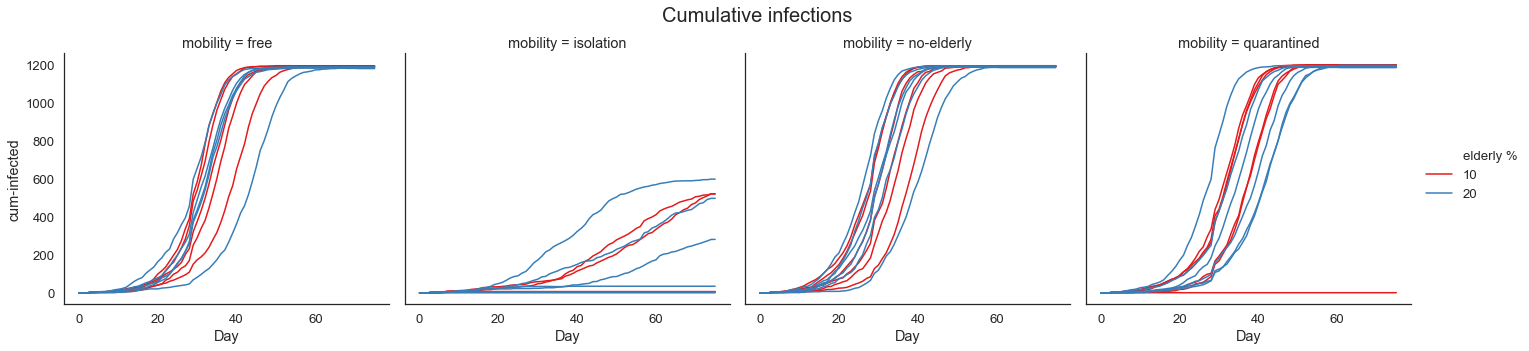

In [83]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  units = 'run', estimator = None, kind = 'line', palette = 'Set1', hue = 'elderly %', data = combidf_19cum)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

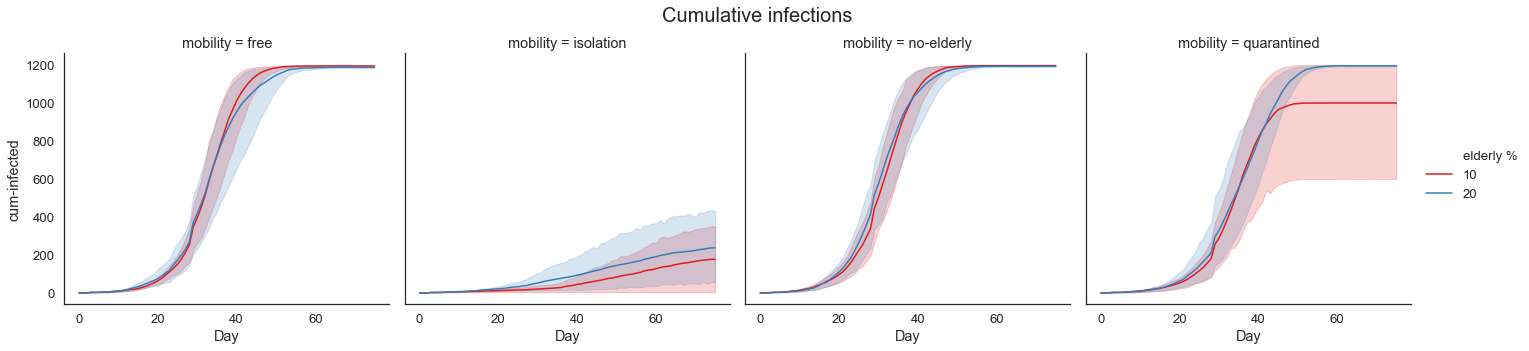

In [84]:
g = sns.relplot(x = 'Day', y = 'cum-infected',col = 'mobility',  kind = 'line', palette = 'Set1', hue = 'elderly %', data = combidf_19cum)
g.fig.suptitle('Cumulative infections', fontsize=20)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

# Tryout parallel coordinates plots with all data

All data gets appended into one big df: totalDF

In [ ]:
totalDF = pd.DataFrame()
totalDF = exp1df
totalDF = totalDF.append([exp2df, exp3df, exp4df])

In [ ]:
totalpivotDF = totalDF.pivot_table(values = ['cum-infected','infected elderly','infected adults','infected children','compliance','queue-distance','plotsize-shelters','IC-capacity','bed-capacity'], index = ['experimentNo','mobility','run','Day'], aggfunc = np.max)
totalDF1 = totalpivotDF.reset_index()
totalDF1

To create a parallel coordinates plot, the names of the mobility restrictions should be changed to numbers:
1. = free
2. = isolation
3. = no-elderly
4. = quarantined

In [ ]:
#For all experiment results:
pcototalDF = totalDF1.replace(to_replace = ['free','isolation','no-elderly','quarantined'], value = [1, 2, 3, 4])
pcototalDF['mobility'].unique()

In [ ]:
# Data visualiseren met ymeanw (strings vervangen voor cijfers)

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = pcototalDF['mobility'],
                   colorscale = 'RdYlGn',
                   showscale = True,
                   cmin = 4,
                   cmax = 1),
        dimensions = list([
            dict(#range = [6,94],
                label = "Day", values = pcototalDF['Day']),
            dict(label = "run", values = pcototalDF['run']),
            dict(tickvals = [1,2,3,4],
                ticktext = ['free', 'isolation', 'no-elderly', 'quarantined'],
#                 constraintrange = [1,2],
                label = "mobility policy", values = pcototalDF["mobility"]),
            dict(range = [min(pcototalDF['cum-infected']), max(pcototalDF['cum-infected'])],
#                  ticktext = ['22 m2', '35 m2', '45 m2'],
                 label = "total infections", values = pcoplotDF12["cum-infected"]),
            dict(range = [min(pcototalDF['infected elderly']), max(pcototalDF['infected elderly'])],
                label = "infected elderly", values = pcoplotDF12['infected elderly']), 
            dict(range = [min(pcototalDF['infected adults']), max(pcototalDF['infected adults'])],
                label = "infected adults", values = pcoplotDF12['infected adults']), 
            dict(range = [min(pcototalDF['infected children']), max(pcototalDF['infected children'])],
                label = "infected children", values = pcoplotDF12['infected children']), 

        ])
    )
)
fig.show()

In [ ]:
#BASIC EXAMPLE: maar dan met mobility als nummertjes

import plotly.express as px

fig = px.parallel_coordinates(pcototalDF, color="mobility",
#                               labels={"experimentNo": "Experiment number", 
#                                       "Pr1:Road-proximity": "Pr1:Road", 
#                                       "Pr2:Neighbour-proximity": "Pr2:Neighbours",
#                                       "Pr3:Healthcare-proximity": "Pr3:Healthcare",
#                                       "average-distance": "Average Distance", 
#                                       "covered-shelters": "Covered shelters", 
#                                       "avg-coverage": "Share of shelters covered",
#                                       "sumovercapacity": "Lack of capacity", 
#                                       "unusedcapacity": "Unused capacity"},
                              dimensions={"mobility","Day", 
                                          "cum-infected", 
                                          "infected elderly",
                                          "infected adults",
                                          "infected children",
                                         "queue-distance",
                                         "plotsize-shelters"},
                             color_continuous_scale=px.colors.diverging.RdYlGn,
                             color_continuous_midpoint=3
                             )
fig.show()

In [ ]:
#For only the first experiment:
pcoplotDF12 = plotDF12.replace(to_replace = ['free','isolation','no-elderly','quarantined'], value = [1, 2, 3, 4])
pcoplotDF12['mobility'].unique()

In [ ]:
# Data visualiseren met ymeanw (strings vervangen voor cijfers)

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = pcoplotDF12['mobility'],
                   colorscale = 'RdYlGn',
                   showscale = True,
                   cmin = 4,
                   cmax = 1),
        dimensions = list([
            dict(#range = [6,94],
                label = "Day", values = pcoplotDF12['Day']),
            dict(label = "run", values = pcoplotDF12['run']),
            dict(tickvals = [1,2,3,4],
                ticktext = ['free', 'isolation', 'no-elderly', 'quarantined'],
#                 constraintrange = [1,2],
                label = "mobility policy", values = pcoplotDF12["mobility"]),
            dict(range = [min(pcoplotDF12['cum-infected']), max(pcoplotDF12['cum-infected'])],
#                  ticktext = ['22 m2', '35 m2', '45 m2'],
                 label = "total infections", values = pcoplotDF12["cum-infected"]),
            dict(range = [min(pcoplotDF12['infected elderly']), max(pcoplotDF12['infected elderly'])],
                label = "infected elderly", values = pcoplotDF12['infected elderly']), 
            dict(range = [min(pcoplotDF12['infected adults']), max(pcoplotDF12['infected adults'])],
                label = "infected adults", values = pcoplotDF12['infected adults']), 
            dict(range = [min(pcoplotDF12['infected children']), max(pcoplotDF12['infected children'])],
                label = "infected children", values = pcoplotDF12['infected children']), 

        ])
    )
)
fig.show()

In [ ]:
#BASIC EXAMPLE: maar dan met mobility als nummertjes

import plotly.express as px

fig = px.parallel_coordinates(pcoplotDF12, color="mobility",
#                               labels={"experimentNo": "Experiment number", 
#                                       "Pr1:Road-proximity": "Pr1:Road", 
#                                       "Pr2:Neighbour-proximity": "Pr2:Neighbours",
#                                       "Pr3:Healthcare-proximity": "Pr3:Healthcare",
#                                       "average-distance": "Average Distance", 
#                                       "covered-shelters": "Covered shelters", 
#                                       "avg-coverage": "Share of shelters covered",
#                                       "sumovercapacity": "Lack of capacity", 
#                                       "unusedcapacity": "Unused capacity"},
                              dimensions={"mobility","Day", 
                                          "cum-infected", 
                                          "infected elderly",
                                          "infected adults",
                                          "infected children" },
                             color_continuous_scale=px.colors.diverging.RdYlGn,
                             color_continuous_midpoint=3
                             )
fig.show()

**To create line plots over time with data about the age groups, the dataset has to be reshaped.**

- Create a dataset with columns: run | Day | mobility | data | dataype
- Plot *data* with hue = *datatype*


- anything can be filled in for mobility | data | dataype

In [ ]:
m1 = pd.melt(plotDF22, id_vars=['run','Day','mobility'], value_vars = ['daily-infections'],
            var_name = 'datatype',value_name = 'data')
m2 = pd.melt(plotDF22, id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotDF22, id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotDF22, id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m25 = m1.append([m2, m3, m4])
m25.head()

In [ ]:
g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m25)
g.fig.suptitle('Daily infections (total and per age group)', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

En zonder de total daily infections:

In [ ]:
m2 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-elderly-infections'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-adults-infections'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(plotDF12, id_vars=['run','Day','mobility'], value_vars = ['daily-children-infections'],
            var_name = 'datatype',value_name = 'data')

m25 = m2.append([m3, m4])
m25.head()

g = sns.relplot(x = 'Day', y = 'data',col = 'mobility', col_wrap = 2, kind = 'line', hue = 'datatype', style = 'datatype', data = m25)
g.fig.suptitle('Daily infections per age group', fontsize=16)
g.fig.subplots_adjust(top=0.88) # moves the subplots down a little bit, creating space for the title.

***Andere manieren om te checken:***

In [ ]:
# a1 = exp1df.sort_values(by = ['tick','run', 'mobility'])
# a1.tail(10)


In [ ]:
# a2 = a[(a.run > 5)]
# pd.DataFrame(a2.groupby(['Day'])['run'].unique())

In [ ]:
# a1.loc[a1['mobility'] == 'no-elderly']

In [ ]:
nu = exp1df.sort_values(['mobility','run','Day','Hour'])
nu['Hour']

### Data selecteren op basis van bepaalde kolom-data

*Aangezien alle experimenten nu los gedraaid zijn is het niet nodig om de run-nummers te vervangen.*

In [ ]:
exp1df['mobility'].unique()

### Visualizeren:

In [ ]:
g = sns.FacetGrid(exp1df, col="mobility", col_wrap=2, height=3.5, hue = 'run')
# g = g.map_dataframe(m.xs['cum-infected'], "Day", "cum-infected")

# g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.plot, "Day", "cum-infected")
      .set_axis_labels("Time in days", "number of infections"))

## Hier hetzelfde probleem als bij thesis: het is één lange lijn die telkens terug gaat naar 0.

In [ ]:
# m.sort_values(['mobility','run','Day'])
# m['run'].replace([6, 7, 8, 9, 10],[1, 2, 3, 4, 5], inplace = True)
# m['run'].replace([11, 12, 13, 14, 15],[1, 2, 3, 4, 5], inplace = True)
# m['run'].replace([16, 17, 18, 19, 20],[1, 2, 3, 4, 5], inplace = True)
# m

In [ ]:
# Dat is het alternatief voor:
# free = m.loc[m.mobility == 'free']
# isolation = m.loc[m.mobility == 'isolation']
# isolation

In [ ]:
m['mobility'].unique()

In [ ]:
g = sns.FacetGrid(m, col="mobility", col_wrap=2, height=3.5)
# g = g.map_dataframe(m.xs['cum-infected'], "Day", "cum-infected")

# g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.plot, "Day", "cum-infected")
      .set_axis_labels("Time in days", "number of infections"))

## Hier hetzelfde probleem als bij thesis: het is één lange lijn die telkens terug gaat naar 0.

## YES!
##### Maar raar: in het geval van no-elderly is de grafiek verkeerd geworden. Data lijkt verloren gegaan!

In [ ]:
# tryout timeseries from: https://stackoverflow.com/questions/37767719/timeseries-plot-with-min-max-shading-using-seaborn
import seaborn.timeseries

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = m
cluster_overload['subindex'] = cluster_overload.groupby(['mobility','Day']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Day', values='cum-infected')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, col="mobility", col_wrap = 2, sharey=False, hue='run', aspect=3)
g = g.map_dataframe(customPlot, 'Day', 'cum-infected','subindex').set_axis_labels("Time in days", "number of infections")


### *Alternative:* reshape dataset to show the different runs

- Create a dataset with columns: run | Day | mobility | data | dataype
- Plot *data* with hue = *datatype*


- anything can be filled in for mobility | data | dataype

In [ ]:
m1 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['cum-infected'],
            var_name = 'datatype',value_name = 'data')
m2 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['infected elderly'],
            var_name = 'datatype',value_name = 'data')
m3 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['infected adults'],
            var_name = 'datatype',value_name = 'data')
m4 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['infected children'],
            var_name = 'datatype',value_name = 'data')

m5 = m1.append([m2, m3, m4])
m5.head()

##### Voor 1 mobility-type:

In [ ]:
free = m5.loc[m5.mobility == 'free']

# ax = sns.lineplot('Day', y = 'value', hue = 'dataype',data = m5)
ax = sns.lineplot('Day', y = 'data', hue = 'datatype', data = free) #, ci = 5, err_style = "band")

In [ ]:
# noelderly = m5.loc[m5.mobility == 'no-elderly']

# ax = sns.lineplot('Day', y = 'data', hue = 'datatype', data = noelderly) #, ci = 5, err_style = "band")

##### Voor verschillende mobility types:
- Werkt goed, kan alleen geen passende y-as maken.
 

In [ ]:
# https://seaborn.pydata.org/tutorial/relational.html
g = sns.relplot(x = 'Day', y = 'data', hue = 'datatype', col = 'mobility', col_wrap = 2, 
            kind = 'line', data = m5, height = 4)
g.fig.suptitle('Total infections', fontsize=16)
g.fig.subplots_adjust(top=0.85) # moves the subplots down a little bit, creating space for the title.

Werkt ook, moet alleen nog handles zien te maken voor de legenda:

In [ ]:
# tryout timeseries from: https://stackoverflow.com/questions/37767719/timeseries-plot-with-min-max-shading-using-seaborn
import seaborn.timeseries



def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = m5
cluster_overload['subindex'] = cluster_overload.groupby(['mobility','Day','datatype']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Day', values='data')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="mobility", sharey=False, hue='datatype', aspect=3)
g = (g.map_dataframe(customPlot, 'Day', 'data','subindex', legend_out = True).add_legend())
# plt.legend()
# g.axes[0,0].set_xlabel[]

## Gewenste statistieken creëeren

**Daily new infections:**

In [ ]:
n1 = m5.groupby(['mobility','datatype','run','Day']).max()
n1.reset_index(inplace = True)
n1['new infections'] = n1['data'].diff()
n1 = n1[n1.Day != 0]
n1.drop(['subindex','data'], axis = 1, inplace = True)
n1.head()

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = n1
cluster_overload['subindex'] = cluster_overload.groupby(['mobility','Day','datatype']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Day', values='new infections')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="mobility", sharey=False, hue='datatype', aspect=3)
g = (g.map_dataframe(customPlot, 'Day', 'new infections','subindex', legend_out = True).add_legend())
plt.legend()
# g.axes[0,0].set_xlabel[]

**Daily deaths**:

In [ ]:
n2 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['cum-dead'],
            var_name = 'datatype',value_name = 'data')

n1 = n2.groupby(['mobility','datatype','run','Day']).max()
n1.reset_index(inplace = True)
n1['total deaths'] = n1['data']
n1 = n1[n1.Day != 0]
n1.drop(['data'], axis = 1, inplace = True)
display(n1.head())

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = n1
cluster_overload['subindex'] = cluster_overload.groupby(['mobility','Day','datatype']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Day', values='total deaths')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="mobility", sharey=False, hue='datatype', aspect=3)
g = (g.map_dataframe(customPlot, 'Day', 'total deaths','subindex', legend_out = True).add_legend())
plt.legend()
# g.axes[0,0].set_xlabel[]

**Hospital capacity:**

In [ ]:
 'IC-capacity', #[ic-capacity] of one-of covid-facilities',
 'bed-capacity

In [ ]:
n1 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['IC-capacity'],
            var_name = 'datatype',value_name = 'data')
n2 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['bed-capacity'],
            var_name = 'datatype',value_name = 'data')
n1 = n1.append(n2)

n1 = n1.groupby(['mobility','datatype','run','Day']).max()
n1.reset_index(inplace = True)
n1['free capacity'] = n1['data']
n1 = n1[n1.Day != 0]
n1.drop(['data'], axis = 1, inplace = True)
display(n1.head())

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = n1
cluster_overload['subindex'] = cluster_overload.groupby(['mobility','Day','datatype']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Day', values='free capacity')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="mobility", sharey=False, hue='datatype', aspect=3)
g = (g.map_dataframe(customPlot, 'Day', 'free capacity','subindex', legend_out = True).add_legend())
plt.legend()
# g.axes[0,0].set_xlabel[]

### How to easily groupby 

__df.groupby( [__  *what columns you want to use as 'groupers'* __] ) [__ *columns you want the data from* __]__

In [ ]:
ymax = m.groupby(["mobility","run"])["cum-infected", "infected elderly", "infected adults","infected children"].max()
ymax = pd.DataFrame(ymax)
ymax

In [ ]:
fig, ax = plt.subplots(2,2, sharey = True, constrained_layout = True,figsize=(8,8)) # constrained layout ensures labels and plots don't overlap.
ymean3.unstack().iloc[0]['cum-infected'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[1]['cum-infected'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[2]['cum-infected'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[3]['cum-infected'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[4]['cum-infected'].plot(kind = 'line', ax = ax[0,0])
# ax[0].set_title('free movement')
ax[0,0].set_title('free movement')


ymean3.unstack().iloc[5]['cum-infected'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[6]['cum-infected'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[7]['cum-infected'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[8]['cum-infected'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[9]['cum-infected'].plot(kind = 'line', ax = ax[0,1])
# ax[1].set_title('isolation of households in case of sickness')
ax[0,1].set_title('isolation of households in case of sickness')

# ymean3.unstack().iloc[10]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[11]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[12]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[13]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[14]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ax[2].set_title('restricted movement for elderly')
ymean3.unstack().iloc[10]['cum-infected'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[11]['cum-infected'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[12]['cum-infected'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[13]['cum-infected'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[14]['cum-infected'].plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('restricted movement for elderly')

# ymean3.unstack().iloc[15]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[16]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[17]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[18]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[19]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ax[3].set_title('quarantine of sick people')
ymean3.unstack().iloc[15]['cum-infected'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[16]['cum-infected'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[17]['cum-infected'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[18]['cum-infected'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[19]['cum-infected'].plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('quarantine of sick people')

fig.suptitle('Total infections', fontsize=16)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=free1.index.values,y = free1.iloc[:,0],
                    mode='lines',
                    name='free, cumulative infections'))
fig.add_trace(go.Scatter(x=free1.index.values,y = free1.iloc[:,1],
                    mode='lines',
                    name='free, infected elderly'))
fig.add_trace(go.Scatter(x=free1.index.values,y = [free1.iloc[:,2]],
                    mode='lines',
                    name='free, infected adults'))
fig.show()

In [ ]:
for i in range(0,5):
    fig.add_trace(go.Scatter(x=free1.index.values,y = free1.iloc[:,i],
                    mode='lines'
                    ))

### Replicate successful plots (for other data types)

In [ ]:
# the total infections 4-subplots, but now for infected elderly
fig, ax = plt.subplots(2,2, sharey = True, constrained_layout = True,figsize=(8,8)) # constrained layout ensures labels and plots don't overlap.
ymean3.unstack().iloc[0]['infected elderly'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[1]['infected elderly'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[2]['infected elderly'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[3]['infected elderly'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[4]['infected elderly'].plot(kind = 'line', ax = ax[0,0])
# ax[0].set_title('free movement')
ax[0,0].set_title('free movement')


ymean3.unstack().iloc[5]['infected elderly'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[6]['infected elderly'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[7]['infected elderly'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[8]['infected elderly'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[9]['infected elderly'].plot(kind = 'line', ax = ax[0,1])
# ax[1].set_title('isolation of households in case of sickness')
ax[0,1].set_title('isolation of households in case of sickness')

# ymean3.unstack().iloc[10]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[11]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[12]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[13]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[14]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ax[2].set_title('restricted movement for elderly')
ymean3.unstack().iloc[10]['infected elderly'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[11]['infected elderly'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[12]['infected elderly'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[13]['infected elderly'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[14]['infected elderly'].plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('restricted movement for elderly')

# ymean3.unstack().iloc[15]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[16]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[17]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[18]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[19]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ax[3].set_title('quarantine of sick people')
ymean3.unstack().iloc[15]['infected elderly'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[16]['infected elderly'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[17]['infected elderly'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[18]['infected elderly'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[19]['infected elderly'].plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('Infections among elderly')

fig.suptitle('Total infections', fontsize=16)


In [ ]:
# the total infections 4-subplots, but now for infected adults
fig, ax = plt.subplots(2,2, sharey = True, constrained_layout = True,figsize=(8,8)) # constrained layout ensures labels and plots don't overlap.
ymean3.unstack().iloc[0]['infected adults'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[1]['infected adults'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[2]['infected adults'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[3]['infected adults'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[4]['infected adults'].plot(kind = 'line', ax = ax[0,0])
# ax[0].set_title('free movement')
ax[0,0].set_title('free movement')


ymean3.unstack().iloc[5]['infected adults'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[6]['infected adults'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[7]['infected adults'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[8]['infected adults'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[9]['infected adults'].plot(kind = 'line', ax = ax[0,1])
# ax[1].set_title('isolation of households in case of sickness')
ax[0,1].set_title('isolation of households in case of sickness')

# ymean3.unstack().iloc[10]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[11]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[12]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[13]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[14]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ax[2].set_title('restricted movement for elderly')
ymean3.unstack().iloc[10]['infected adults'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[11]['infected adults'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[12]['infected adults'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[13]['infected adults'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[14]['infected adults'].plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('restricted movement for elderly')

# ymean3.unstack().iloc[15]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[16]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[17]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[18]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[19]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ax[3].set_title('quarantine of sick people')
ymean3.unstack().iloc[15]['infected adults'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[16]['infected adults'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[17]['infected adults'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[18]['infected adults'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[19]['infected adults'].plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('Infections among adults')

fig.suptitle('Total infections', fontsize=16)


In [ ]:
# the total infections 4-subplots, but now for infected children
fig, ax = plt.subplots(2,2, sharey = True, constrained_layout = True,figsize=(8,8)) # constrained layout ensures labels and plots don't overlap.
ymean3.unstack().iloc[0]['infected children'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[1]['infected children'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[2]['infected children'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[3]['infected children'].plot(kind = 'line', ax = ax[0,0])
ymean3.unstack().iloc[4]['infected children'].plot(kind = 'line', ax = ax[0,0])
# ax[0].set_title('free movement')
ax[0,0].set_title('free movement')


ymean3.unstack().iloc[5]['infected children'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[6]['infected children'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[7]['infected children'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[8]['infected children'].plot(kind = 'line', ax = ax[0,1])
ymean3.unstack().iloc[9]['infected children'].plot(kind = 'line', ax = ax[0,1])
# ax[1].set_title('isolation of households in case of sickness')
ax[0,1].set_title('isolation of households in case of sickness')

# ymean3.unstack().iloc[10]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[11]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[12]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[13]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ymean3.unstack().iloc[14]['cum-infected'].plot(kind = 'line', ax = ax[2])
# ax[2].set_title('restricted movement for elderly')
ymean3.unstack().iloc[10]['infected children'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[11]['infected children'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[12]['infected children'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[13]['infected children'].plot(kind = 'line', ax = ax[1,0])
ymean3.unstack().iloc[14]['infected children'].plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('restricted movement for elderly')

# ymean3.unstack().iloc[15]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[16]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[17]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[18]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ymean3.unstack().iloc[19]['cum-infected'].plot(kind = 'line', ax = ax[3])
# ax[3].set_title('quarantine of sick people')
ymean3.unstack().iloc[15]['infected children'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[16]['infected children'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[17]['infected children'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[18]['infected children'].plot(kind = 'line', ax = ax[1,1])
ymean3.unstack().iloc[19]['infected children'].plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('quarantine of sick people')

fig.suptitle('Infections among children', fontsize=16)


In [ ]:
m.head()
xmean = m.groupby(["mobility","run","Day"] )["cum-infected", "infected elderly", "infected adults","infected children"].mean()
# xmean.set_index([])
# xmean.set_index(["cum-infected", "infected elderly", "infected adults","infected children"])
xmean = xmean.unstack()
# xmean.set_index(["Day"])

xmean.unstack()

Kan ik dit nu plotten?

In [ ]:
fig, ax = plt.subplots()
xmean.plot(x = 'Day',y = 'cum-infected')

#### Alternative tryout to enable plotting:

### Vanaf hier uitproberen en knoeien:

Vervang de strings voor values en maak een parallel coordinates plot:

In [ ]:
ymeanu['mobility'].unique()

In [ ]:
ymeanw = ymeanu.replace(ymeanu['mobility'].unique(), [1,2,3,4])
ymeanw.head()

In [ ]:
# Data visualiseren met ymeanw (strings vervangen voor cijfers)

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = ymeanw['mobility'],
                   colorscale = 'RdYlGn',
                   showscale = True,
                   cmin = 4,
                   cmax = 1),
        dimensions = list([
            dict(#range = [6,94],
                label = "Day", values = ymeanw['Day']),
            dict(tickvals = [1,2,3,4],
                ticktext = ['free', 'isolation', 'no-elderly', 'quarantined'],
#                 constraintrange = [1,2],
                label = "mobility policy", values = ymeanw["mobility"]),
            dict(range = [min(ymeanw['cum-infected']), max(ymeanw['cum-infected'])],
#                  ticktext = ['22 m2', '35 m2', '45 m2'],
                 label = "total infections", values = ymeanw["cum-infected"]),
            dict(range = [min(ymeanw['infected elderly']), max(ymeanw['infected elderly'])],
                label = "infected elderly", values = ymeanw['infected elderly']), 
            dict(range = [min(ymeanw['infected adults']), max(ymeanw['infected adults'])],
                label = "infected adults", values = ymeanw['infected adults']), 
            dict(range = [min(ymeanw['infected children']), max(ymeanw['infected children'])],
                label = "infected children", values = ymeanw['infected children']), 

        ])
    )
)
fig.show()

In [ ]:
#BASIC EXAMPLE: maar dan met mobility als nummertjes

import plotly.express as px

fig = px.parallel_coordinates(ymeanw, color="mobility",
#                               labels={"experimentNo": "Experiment number", 
#                                       "Pr1:Road-proximity": "Pr1:Road", 
#                                       "Pr2:Neighbour-proximity": "Pr2:Neighbours",
#                                       "Pr3:Healthcare-proximity": "Pr3:Healthcare",
#                                       "average-distance": "Average Distance", 
#                                       "covered-shelters": "Covered shelters", 
#                                       "avg-coverage": "Share of shelters covered",
#                                       "sumovercapacity": "Lack of capacity", 
#                                       "unusedcapacity": "Unused capacity"},
                              dimensions={"mobility","Day", 
                                          "cum-infected", 
                                          "infected elderly",
                                          "infected adults",
                                          "infected children" },
                             color_continuous_scale=px.colors.diverging.RdYlGn,
                             color_continuous_midpoint=3
                             )
fig.show()

In [ ]:
# df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(ymeanu, x="Day", y="cum-infected", line_group = 'run', color='mobility', hover_name = 'run')
fig.add_trace(go.Scatter(ymeanu, x="Day", y="infected elderly", line_group = 'run', color='mobility', hover_name = 'run'))
fig.show()

# fig.add_trace(go.Scatter(x=ymeanu['Day'], y = ymeanu['infected elderly'], name = 'infected elderly', line = dict(color = 'firebrick', dash = 'dot')))
# fig.add_trace(go.Scatter(x=ymeanu['Day'], y = ymeanu['infected adults'], name = 'infected adults', line = dict(color = 'green', dash = 'dot')))

In [ ]:
ymeanu.head()

In [ ]:
fig = go.Figure()
days = ymeanu['Day']
fig.add_trace(go.Scatter(x=ymeanu['Day'], y = ymeanu['infected elderly'], name = 'infected elderly', line = dict(color = 'firebrick', dash = 'dot')))
fig.add_trace(go.Scatter(x=ymeanu['Day'], y = ymeanu['infected adults'], name = 'infected adults', line = dict(color = 'green', dash = 'dot')))
fig.add_trace(go.Scatter(x=ymeanu['Day'], y = ymeanu['infected children'], name = 'infected children', line = dict(color = 'blue', dash = 'dot')))

In [ ]:
f, a = plt.subplots(3,1)
ymean.xs('free').plot(kind='line',ax=a[0])
ymean.xs('no-elderly').plot(kind='line',ax=a[1])
ymean.xs('isolation').plot(kind='line',ax=a[2])

In [ ]:
for date, new_df in df.groupby(level=0):
     ...:     print(new_df)

In [ ]:
for mobility, i in expdf1.groupby(['mobility','run','Day'])['cum-infected'].max())

In [ ]:
dailyinfections['daily-infections'] = 0
for idx, df_select in dailyinfections.groupby(level=[0, 1]):
    for i in range(0,expdf1['Day'].max()-1):
        dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]

dailyinfections

In [ ]:
dailyinfections2 = pd.DataFrame()
for mobility, i in dailyinfections.groupby(level=0):
    for i in range(0,expdf1['Day'].max()-1):
        dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]
        
dailyinfections

In [ ]:
for mobility, i in dailyinfections.groupby(level=0):
    for i in dailyinfections.iterrows():
        dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]
        
dailyinfections

In [ ]:
for index, row in dailyinfections.iterrows():
    dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]
        
dailyinfections

In [ ]:
iets doen met foreach[i]:
    

In [ ]:
a = dailyinfections.index.get_level_values(level=0).unique()
a[1]

In [ ]:
b = dailyinfections.index.get_level_values(level=1).unique()
b

In [ ]:
for a in dailyinfections.index.get_level_values(level=0).unique():
    #create a dataframe with name df-a?
    for b in dailyinfections.index.get_level_values(level=1).unique():
        #create a dataframe with name df-b?
        
#         for i in range(0,expdf1['Day'].max()-1):
#         dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]

        # append df-b's into dailyinfections2
    

In [ ]:
dailyinfections[a[1],b[1]]

In [ ]:
dailyinfections.groupby(level=0)

In [ ]:
dailyinfections = pd.DataFrame(expdf1.groupby(['mobility','run','Day'])['cum-infected'].max())
dailyinfections['daily-infections'] = 0

#dit werkt voor één keer de range:
for i in range(0,expdf1['Day'].max()-1):
    dailyinfections['daily-infections'][i] = dailyinfections['cum-infected'][i+1] - dailyinfections['cum-infected'][i]

In [ ]:
dailyinfections.index.get_level_values(0)

In [ ]:
dailyinfections

In [ ]:
dailyinfections3 = exp1df.groupby(['mobility','run','Day'])['cum-infected']

In [ ]:
dailyinfections3.get_group('free')

In [ ]:
dailyinfections3.plot()

In [ ]:
dailyinfections4 = exp1df.groupby(['mobility','run','Day'])['cum-infected']
dailyinfections5 = dailyinfections4.max()

# dailyinfections4.get_group['free']

In [ ]:
dailyinfections5.plot()

### Viewing the data using a multi-index

In [ ]:
exp1df.head()

In [ ]:
exp1df2 = exp1df.set_index(['mobility','run','Day'])
exp2df2 = exp2df.set_index(['mobility','run','Day'])
exp3df2 = exp3df.set_index(['mobility','run','Day'])
exp1df2

In [ ]:
exp1df2.sort_index(inplace = True)
exp2df2.sort_index(inplace = True)
exp3df2.sort_index(inplace = True)

exp1df2

In [ ]:
exp1df3 = exp1df2.loc[:,'cum-infected']
exp1df3.diff()

In [ ]:
# How to create subplots using a for loop for each run and each mobility
mobilities = exp1df3.index.get_level_values(0).unique()
mobilities
runs = exp1df3.index.get_level_values(1).unique()
runs

for mobility in mobilities:
        splitmob = exp1df3.xs(mobility)
        for run in runs:
            splitrun = splitmob.xs(run)
            plt.subplots()
            splitrun.plot(kind='line').legend()